En esta fase se desarrolla el análisis exploratorio del conjunto de datos final, con el objetivo de comprender su estructura, describir la distribución de las variables e identificar patrones relevantes. Se evalúan tendencias, posibles valores extremos y relaciones que existen entre variables, especialmente en torno a la variable objetivo `is_fraud`.

## Objetivo del análisis exploratorio de datos

El objetivo de este análisis exploratorio es examinar en profundidad el comportamiento y las características de las transacciones con tarjeta de crédito, mediante la integración de información económica a nivel de código postal, con el fin de comprender cómo se distribuye el fraude y qué factores se asocian con una mayor probabilidad de fraude. A través de esta revisión se pretende interpretar cada transacción no únicamente por sus atributos operativos, sino también considerando el entorno socioeconómico asociado al área en el que se produce, lo que permite ampliar el alcance del análisis y aportar una interpretación más completa.

El análisis busca identificar patrones y tendencias relevantes, así como posibles relaciones entre el fraude y variables clave del dataset, como el importe de la transacción, la categoría del comercio, la ubicación geográfica y los indicadores económicos agregados por ZIP. Los resultados obtenidos servirán como base para el análisis estadístico posterior, ayudando a priorizar variables de interés, establecer hipótesis de trabajo y definir indicadores y segmentaciones útiles para la elaboración del informe final.

## Importación de librerias

In [1]:
# Tratamiento de datos.

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Visualizaciones.

import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos `df_final.parquet`

In [2]:
df_final = pd.read_parquet("../data/2.processed/df_final.parquet")

Se inspecciona el encabezado del dataset para comprobar que la carga se ha realizado sin incidencias.

In [3]:
df_final.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,number_of_returns,adjusted_gross_income_agi,avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
0,2019-06-22 12:28:00,fraud_Predovic Inc,Shopping_net,5.79,Male,Reno,Texas,89512,276896,Immunologist,1997-03-12,0,9810.0,291026.0,29.666259,9810.0,293304.0,29.898471,6420.0,149740.0,23.323988
1,2019-04-28 19:43:17,"fraud_Turner, Ziemann and Lehner",Food_dining,55.25,Male,Palermo,Ohio,58769,229,Administrator,1983-03-20,0,150.0,19468.0,129.786667,150.0,19782.0,131.880000,130.0,16059.0,123.530769
2,2019-11-26 13:06:50,"fraud_Schroeder, Wolff and Hermiston",Travel,525.26,Male,Richland,Pennsylvania,08350,825,Licensed Conveyancer,1991-07-06,0,380.0,18448.0,48.547368,380.0,18677.0,49.150000,310.0,11536.0,37.212903
3,2019-06-19 12:30:36,"fraud_Schroeder, Wolff and Hermiston",Travel,7.94,Female,Hawley,Michigan,56549,4508,Naval Architect,1949-04-24,0,2260.0,148251.0,65.597788,2260.0,151377.0,66.980973,1910.0,102419.0,53.622513
4,2019-05-19 18:01:52,fraud_Baumbach Ltd,Personal_care,9.55,Male,Comfrey,North Carolina,56019,914,Health And Safety Adviser,1944-07-26,0,440.0,22379.0,50.861364,440.0,23428.0,53.245455,360.0,14901.0,41.391667


Se consulta el final del dataset para asegurar que no existen cortes o anomalías en los registros finales.

In [4]:
df_final.tail()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,number_of_returns,adjusted_gross_income_agi,avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
325085,2019-06-20 15:07:33,"fraud_Baumbach, Strosin and Nicolas",Shopping_pos,8.23,Female,Hedley,Wisconsin,79237,513,Early Years Teacher,1976-05-24,0,180.0,5351.0,29.727778,180.0,5451.0,30.283333,110.0,2905.0,26.409091
325086,2019-04-25 12:02:16,fraud_Erdman-Ebert,Personal_care,9.78,Female,Hopewell,California,23860,31970,Purchasing Manager,1935-08-15,0,12540.0,515284.0,41.091228,12540.0,519508.0,41.428070,9170.0,306179.0,33.389204
325087,2019-10-25 16:49:47,"fraud_O'Connell, Botsford and Hand",Home,26.62,Male,Grenada,Kentucky,96038,589,Systems Analyst,1945-12-21,0,280.0,11039.0,39.425000,280.0,11223.0,40.082143,200.0,5706.0,28.530000
325088,2019-01-15 20:24:39,"fraud_Witting, Beer and Ernser",Home,3.70,Female,Norwich,Minnesota,43767,1443,Research Scientist (Medical),1962-03-04,0,650.0,35001.0,53.847692,650.0,35515.0,54.638462,550.0,22850.0,41.545455
325089,2019-10-05 19:15:19,fraud_Kassulke Inc,Entertainment,14.30,Male,Greenwich,New York,08323,804,Insurance Risk Surveyor,1965-03-25,0,360.0,23882.0,66.338889,360.0,24325.0,67.569444,300.0,16373.0,54.576667


### Dimensión del dataset

Se verifica la forma del dataset para confirmar el volumen de información.

In [5]:
print(f"El número de filas es {df_final.shape[0]} y el número de columnas es {df_final.shape[1]} ")

El número de filas es 325090 y el número de columnas es 21 


In [6]:
df_final.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'is_fraud',
       'number_of_returns', 'adjusted_gross_income_agi', 'avg_agi',
       'number_of_returns_with_total_income', 'total_income_amount',
       'avg_total_income', 'number_of_returns_with_taxable_income',
       'taxable_income_amount', 'avg_taxable_income'],
      dtype='object')

In [7]:
df_final.isna().sum().sort_values(ascending=False)

trans_date_trans_time                    0
merchant                                 0
category                                 0
amt                                      0
gender                                   0
city                                     0
state                                    0
zip                                      0
city_pop                                 0
job                                      0
dob                                      0
is_fraud                                 0
number_of_returns                        0
adjusted_gross_income_agi                0
avg_agi                                  0
number_of_returns_with_total_income      0
total_income_amount                      0
avg_total_income                         0
number_of_returns_with_taxable_income    0
taxable_income_amount                    0
avg_taxable_income                       0
dtype: int64

Se comprueba la existencia de valores nulos mediante el método **isna()** de pandas. Los resultados indican que no hay valores faltantes en ninguna variable, por lo que no es necesario aplicar tratamientos adicionales por este motivo.

In [8]:
df_final.duplicated().sum()

np.int64(0)

Se verifica la presencia de filas duplicadas en el conjunto de datos. No se detectan duplicados, lo que evita distorsiones en recuentos, distribuciones y análisis posteriores.

In [9]:
df_final.dtypes

trans_date_trans_time                    datetime64[ns]
merchant                                       category
category                                       category
amt                                             float64
gender                                         category
city                                           category
state                                          category
zip                                              object
city_pop                                          int64
job                                            category
dob                                      datetime64[ns]
is_fraud                                          int64
number_of_returns                               float64
adjusted_gross_income_agi                       float64
avg_agi                                         float64
number_of_returns_with_total_income             float64
total_income_amount                             float64
avg_total_income                                

Se revisa el tipo de dato de cada columna para garantizar coherencia en cálculos y visualizaciones. Esta revisión minimiza errores y asegura que las transformaciones y análisis se ejecuten de forma correcta.

## Creación de nuevas variables

Se generan nuevas variables a partir de las existentes para mejorar la calidad analítica del dataset, reducir la complejidad de ciertas relaciones y habilitar segmentaciones que aporten valor al análisis exploratorio y al dashboard.

### Variables temporales

In [10]:
df_final["trans_date"] = df_final["trans_date_trans_time"].dt.date

df_final["trans_date"] = pd.to_datetime(df_final['trans_date'])

df_final["day_of_week"] = df_final["trans_date_trans_time"].dt.day_name()

df_final["hour"] = df_final["trans_date_trans_time"].dt.hour

In [11]:
def moment_of_day(h):

    if 0 <= h <= 4:
        return "night"
    
    elif 5 <= h <= 7:
        return "early morning"   
    
    elif 8 <= h <= 11:
        return "morning"
    
    elif 12 <= h <= 16:
        return "afternoon"
    
    elif 17 <= h <= 20:
        return "evening"
    
    else:
        return "late night"
    
df_final["moment_of_day"] = df_final["hour"].map(moment_of_day)

Se crean variables temporales derivadas de `trans_date_trans_time` para analizar el comportamiento de las transacciones y detectar patrones asociados al fraude. En concreto, se extraen componentes como año, mes, día de la semana y hora, lo que permite estudiar tendencias, estacionalidad y variaciones recurrentes a lo largo del tiempo. Además, se define `is_weekend` para comparar de forma directa días laborables vs fines de semana, simplificando el análisis y la interpretación en tablas y visualizaciones.

Finalmente, se agrupa la hora en franjas `moment_of_day` mediante intervalos más detallados. Con esto se busca reducir el ruido de trabajar con 24 categorías distintas y mejora la interpretabilidad, facilitando comparaciones y visualizaciones en el EDA y en el dashboard posterior. En conjunto, estas transformaciones permiten analizar la tasa de fraude y el volumen de transacciones por periodos y franjas horarias, identificando estacionalidad, tendencias y posibles comportamientos anómalos en horarios menos habituales.

### Variables de edad

In [12]:
df_final["age"] = ((df_final["trans_date_trans_time"] - df_final["dob"]).dt.days / 365.25).astype(int)

In [13]:
print(df_final["age"].max())

print(df_final["age"].min())

95
13


In [14]:
ages = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]

ages_segments = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85", "86+"]

df_final["age_group"] = pd.cut(df_final["age"], bins=ages, labels=ages_segments)

Se crea la variable `age` para disponer de una medida cuantitativa del perfil del cliente en el momento de la transacción, calculada a partir de la diferencia entre la fecha de la transacción y la fecha de nacimiento. Esta variable permite analizar si existen diferencias en el importe, la frecuencia y la tasa de fraude según la edad, y facilita la detección de patrones demográficos relevantes.

Posteriormente, se construye `age_group`, agrupando la edad en rangos predefinidos. Esto mejora la interpretabilidad y la comparación de resultados, ya que permite equiparar segmentos de edad, en vez de trabajar con edades individuales.

### Variables socioeconómicas

In [15]:
df_final["taxable_share"] = (df_final["taxable_income_amount"] / df_final["total_income_amount"])

Se calcula `taxable_share`, representa que parte del ingreso total es imponible. Esta variable aporta información sobre la estructura económica del ZIP y permite analizar si el patrón de fraude y consumo cambia en zonas donde una mayor proporción del ingreso está sujeta a tributación.

In [16]:
df_final["amt_vs_avg_agi"] = df_final["amt"] / df_final["avg_agi"]

Se genera `amt_vs_avg_agi`, para contextualizar el importe de cada transacción respecto al nivel de renta medio del ZIP. De este modo, una misma cantidad puede interpretarse en términos relativos, facilitando la comparación entre zonas con diferentes niveles de ingresos y ayudando a identificar transacciones inusualmente altas para su contexto socioeconómico.

In [17]:
income_segment = ["low", "lower-middle", "upper-middle", "high"]

df_final["income_level"] = pd.qcut(df_final["avg_agi"], q = 4, labels = income_segment)

Se crea `income_bracket` dividiendo `avg_agi` en cuatro grupos. Esta segmentación transforma una variable continua en categorías, mejorando la lectura de resultados y permitiendo comparar métricas como la tasa de fraude y el importe medio entre distintos niveles de renta.

### Eliminación de variables para reducir el ruido

In [18]:
cols_drop = ["trans_date_trans_time", "dob", "adjusted_gross_income_agi", "total_income_amount", "taxable_income_amount", "number_of_returns_with_total_income", "number_of_returns_with_taxable_income"]

df_final.drop(columns=cols_drop, inplace=True)

**Observaciones:**

`trans_date_trans_time`: Se elimina para simplificar el EDA, ya que se trabaja con componentes ya extraídos `trans_date`, `hour`, `day_of_week` y `moment_of_day`. Mantenerlo todo sería redundante y añade complejidad sin aportar valor adicional al análisis.

`dob`: Se elimina porque la información relevante para el análisis demográfico ya está sintetizada en age. Mantener la fecha de nacimiento es redundante para el EDA y no añade interpretación adicional.

`adjusted_gross_income_agi`: Se elimina porque es un total agregado por ZIP que está fuertemente condicionado por el tamaño del número de declaraciones del área. Para comparar zonas de forma interpretable es preferible usar métricas normalizadas como `avg_agi` o segmentaciones como `income_level`.

`total_income_amount`: Se elimina por ser un total agregado, dependiente del volumen de declarantes, a efectos de comparación entre zonas aporta menos que `avg_total_income`, que está normalizado.

`taxable_income_amount`: Se elimina por que es un total agregado. La variable `avg_taxable_income` y el ratio `taxable_share` capturan la información de forma más comparable y útil.

`number_of_returns_with_total_income`: Se elimina porque es un desglose del conteo de declaraciones que suele aportar poca información adicional para el EDA básico, y además introduce colinealidad respecto a `number_of_returns` y las medias de ingresos.

`number_of_returns_with_taxable_income`: Se elimina porque es un conteo segmentado que no aporta conclusiones claras en un EDA, y tiende a duplicar la señal con `number_of_returns` y los promedios.



### Variables del conjunto de datos

Se revisa el conjunto de campos disponibles para preparar el análisis.

In [19]:
print(f"Tras la creación de las nuevas variables, y la eliminación de las variables que pueden generar ruido, el número de filas es {df_final.shape[0]} y el número de columnas es {df_final.shape[1]}, suficiente para realizar nuestro ánalisis")

Tras la creación de las nuevas variables, y la eliminación de las variables que pueden generar ruido, el número de filas es 325090 y el número de columnas es 23, suficiente para realizar nuestro ánalisis


In [20]:
df_final.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip',
       'city_pop', 'job', 'is_fraud', 'number_of_returns', 'avg_agi',
       'avg_total_income', 'avg_taxable_income', 'trans_date', 'day_of_week',
       'hour', 'moment_of_day', 'age', 'age_group', 'taxable_share',
       'amt_vs_avg_agi', 'income_level'],
      dtype='object')

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325090 entries, 0 to 325089
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   merchant            325090 non-null  category      
 1   category            325090 non-null  category      
 2   amt                 325090 non-null  float64       
 3   gender              325090 non-null  category      
 4   city                325090 non-null  category      
 5   state               325090 non-null  category      
 6   zip                 325090 non-null  object        
 7   city_pop            325090 non-null  int64         
 8   job                 325090 non-null  category      
 9   is_fraud            325090 non-null  int64         
 10  number_of_returns   325090 non-null  float64       
 11  avg_agi             325090 non-null  float64       
 12  avg_total_income    325090 non-null  float64       
 13  avg_taxable_income  325090 no

### Separación de variables numéricas y categóricas

Se clasifican las variables en función de su naturaleza para estructurar el análisis exploratorio de manera más eficiente.

In [22]:
cols_num_final  = df_final.select_dtypes(include='number').columns

cols_cate_final = df_final.select_dtypes(include=['object', 'category']).columns

print(f"Las variables numéricas son: {cols_num_final}\n")

print(f"Las variables categóricas son: {cols_cate_final}")

Las variables numéricas son: Index(['amt', 'city_pop', 'is_fraud', 'number_of_returns', 'avg_agi',
       'avg_total_income', 'avg_taxable_income', 'hour', 'age',
       'taxable_share', 'amt_vs_avg_agi'],
      dtype='object')

Las variables categóricas son: Index(['merchant', 'category', 'gender', 'city', 'state', 'zip', 'job',
       'day_of_week', 'moment_of_day', 'age_group', 'income_level'],
      dtype='object')


### Variable objetivo `is_fraud`

In [23]:
print(df_final["is_fraud"].value_counts())

print((df_final["is_fraud"].value_counts(normalize=True) * 100).round(2))

is_fraud
0    323189
1      1901
Name: count, dtype: int64
is_fraud
0    99.42
1     0.58
Name: proportion, dtype: float64


Distribución de `is_fraud`

La variable objetivo `is_fraud` indica si una transacción se clasifica como `fraude` = **1** o `no fraude` = **0**. El recuento muestra una clara predominancia de operaciones legítimas frente a un número reducido de casos de fraude, lo que confirma una proporción muy baja de la clase positiva.

Esta distribución evidencia un fuerte desbalance de clases, la tasa de fraude es minoritaria, por lo que un modelo que predijera siempre **no fraude** podría obtener una exactitud aparente alta, pero resultaría poco útil para el objetivo real, que es detectar transacciones fraudulentas.

En resumen, `is_fraud` refleja un escenario habitual en detección de fraude, pocas incidencias frente a un gran volumen de operaciones normales, lo que condiciona el enfoque analítico y obliga a priorizar métricas y técnicas adecuadas para la clase minoritaria en fases posteriores.

### Análisis univariante de variables numéricas

Resumen estadistico

In [24]:
df_final.describe(include= 'number').round(2).T

,count,mean,std,min,25%,50%,75%,max
amt,325090.0,70.34,156.07,1.00,9.60,47.10,82.89,25086.94
city_pop,325090.0,103571.97,325212.23,140.00,1324.00,4056.00,33804.00,2906700.00
is_fraud,325090.0,0.01,0.08,0.00,0.00,0.00,0.00,1.00
number_of_returns,325090.0,5049.18,6883.12,100.00,560.00,1680.00,7660.00,44600.00
avg_agi,325090.0,56.05,29.83,19.58,41.35,48.57,60.76,418.18
avg_total_income,325090.0,56.99,30.41,19.76,42.15,49.59,61.78,424.36
avg_taxable_income,325090.0,47.74,29.01,13.68,33.76,40.44,51.50,390.89
hour,325090.0,12.84,6.81,0.00,7.00,14.00,19.00,23.00
age,325090.0,45.13,17.35,13.00,32.00,43.00,56.00,95.00
taxable_share,325090.0,0.63,0.07,0.31,0.58,0.63,0.67,0.88


**Observaciones:**

`amt`: La variable presenta una media de 70,34 y una desviación estándar de 156,07, lo que indica una dispersión elevada en los importes. Aunque la mayor parte de las transacciones se sitúa en rangos relativamente bajos (Q1) 9,60 y (Q3) 82,89, el máximo alcanza 25.086,94, muy por encima del comportamiento general. Esta diferencia refleja una distribución fuertemente asimétrica hacia la derecha y sugiere la existencia de operaciones de importe excepcional que conviene considerar como valores extremos en el análisis.

`city_pop`: Muestra una media de 103.571,97 y una desviación estándar muy alta de 325.212,23, lo que confirma una gran heterogeneidad en el tamaño de las localidades asociadas a las transacciones. Los cuartiles (Q1) 1.324, (Q3) 33.804 indican que una parte relevante de los registros procede de áreas poco pobladas, mientras que el máximo 2.906.700 evidencia la presencia de grandes núcleos urbanos. En conjunto, la variable presenta una cola hacia la derecha y una variabilidad muy significativa entre ZIPs.

`is_fraud`: Al tratarse de una variable binaria, su media representa la proporción de fraude en el conjunto. El valor medio es cercano a 0,01, lo que confirma que el fraude es un evento minoritario y que existe un desbalanceo importante entre clases. Este comportamiento implica que, conviene interpretar resultados en términos de tasa y no solo de volumen.

`number_of_returns`: Presenta una media de 5.049,18 con desviación estándar de 6.883,12, reflejando una dispersión considerable en el número de declaraciones por ZIP. El rango va de 100 a 44.600 y el tramo central va desde (Q1) 560, hasta (Q3) 7.660 queda muy por debajo del máximo, lo que sugiere una asimetría positiva. Esto indica que, aunque la mayoría de códigos postales registra volúmenes moderados, existe un subconjunto reducido con un número de declaraciones significativamente superior.

`avg_agi`: Registra una media de 56,05 y una desviación estándar de 29,83, con valores típicos concentrados en torno a (Q1) 41,35 y (Q3) 60,76. Sin embargo, el máximo llega a 418,18, muy alejado del rango habitual, lo que sugiere outliers en promedios para determinados ZIPs.

`avg_total_income`: Presenta una media de 56,99 y una desviación estandar de 30,41 con un rango que va desde 19,76 hasta 424,36. La mayor parte de los valores se concentra en niveles moderados (Q1) 42,15 y (Q3) 61,78, mientras que los máximos reflejan casos puntuales con promedios muy elevados. Este comportamiento refuerza la idea de que, existen ZIPs con promedios inusualmente altos que pueden influir en la media global.

`avg_taxable_income`: Muestra una media de 47,74 y una desviación estándar de 29,01, con valores típicos entre (Q1) 33,76 y (Q3) 51,50. Su nivel central es inferior al de **avg_agi** y **avg_total_income**, lo que resulta coherente dado que el ingreso imponible suele ser una parte del ingreso total. No obstante, el máximo de 390,89 se aleja notablemente del comportamiento general, indicando la presencia de ZIPs con promedios imponibles inusualmente altos que pueden considerarse casos atípicos para análisis comparativos.

`hour`: Presenta una media de 12,84 y una desviación estándar de 6,81, lo que indica que las transacciones se distribuyen a lo largo del día con una concentración moderada en torno a horas centrales. El rango va de 0 a 23, los cuartiles (Q1) 7, (Q3) 19 muestran que el 50% de las transacciones se produce entre primeras horas de la mañana y la tarde noche.

`age`: Muestra una media de 45,13 años y una desviación estándar de 17,35, reflejando una variabilidad considerable en el perfil de edad. Los valores típicos se concentran entre (Q1) 32 y (Q3) 56. El mínimo es 13 y el máximo 95, lo que indica presencia de usuarios muy jóvenes y muy mayores, aunque la mayor parte del conjunto se sitúa en rangos de edad adulta.

`taxable_share`: Presenta una media de 0,63 y una desviación estándar baja de 0,07, lo que indica que la proporción de ingreso imponible respecto al ingreso total es relativamente estable entre ZIPs. Los cuartiles (Q1) 0,58 y (Q3) 0,67 confirman una concentración elevada alrededor del valor central, con un rango que va desde 0,31 hasta 0,88. Los valores extremos sugieren ZIPs con estructuras de ingresos atípicas o con diferencias relevantes en deducciones o ingresos no imponibles, pero en general la variable muestra poca dispersión comparada con otras variables económicas.

`amt_vs_avg_agi`: Registra una media de 1,44 y una desviación estándar de 3,48, lo que evidencia una elevada dispersión y la presencia de valores extremos. Aunque el rango central se mantiene en valores de (Q1) 0,20 y (Q3) 1,73, el máximo alcanza 719,61, muy alejado del comportamiento general. Esto indica que existen transacciones cuyo importe es excepcionalmente alto en relación con la renta media del ZIP, generando una distribución fuertemente asimétrica hacia la derecha.

In [25]:
df_final[cols_num_final].median().round(2)

amt                     47.10
city_pop              4056.00
is_fraud                 0.00
number_of_returns     1680.00
avg_agi                 48.57
avg_total_income        49.59
avg_taxable_income      40.44
hour                    14.00
age                     43.00
taxable_share            0.63
amt_vs_avg_agi           0.86
dtype: float64

**Observaciones:**

`amt`: La mediana del importe es 47,10, lo que indica que el valor típico de una transacción se sitúa en torno a ese nivel. Al compararlo con la media 70.34, se aprecia que existen operaciones de importe elevado que incrementan el promedio, por lo que la mediana representa mejor el comportamiento central del gasto.

`city_pop`: La mediana de la población es 4.056, lo que sugiere que una parte importante de las transacciones se asocia a localidades relativamente pequeñas. Dado que la media es muy superior 103571.97, se deduce que hay un conjunto menor de ZIPs pertenecientes a grandes ciudades que desplazan el promedio hacia arriba, reflejando una distribución heterogénea por tamaño de localidad.

`is_fraud`: La mediana es 0, coherente con el carácter minoritario del fraude. Esto confirma que, en el punto central de la distribución, lo habitual es que la transacción no sea fraudulenta, y refuerza el desbalanceo de la variable objetivo.

`number_of_returns`: La mediana es de 1.680 declaraciones por ZIP, lo que describe un nivel moderado de actividad fiscal en la mayoría de áreas. La diferencia respecto a la media sugiere la existencia de ZIPs con volúmenes de declaraciones más altos que elevan el promedio, por lo que en este caso la mediana ofrece una referencia más representativa del conjunto.

`avg_agi`: La mediana es 48,57, lo que sugiere que el promedio del AGI por declaración se sitúa en torno a ese nivel. La diferencia con la media 56.05 evidencia que ciertos ZIPs presentan promedios especialmente altos que elevan el valor medio, mientras que la mediana resume mejor el patrón habitual.

`avg_total_income`: La mediana es 49,59, lo que indica que el ingreso total promedio por declaración se sitúa típicamente alrededor de ese valor. La media 56.99 es superior, lo que sugiere que existen áreas con promedios de ingreso total más elevados que incrementan el promedio global.

`avg_taxable_income`: La mediana es 40,44, inferior a **avg_agi** y **avg_total_income**, lo cual tiene sentido, ya que el ingreso imponible suele ser una parte del ingreso total, y por esta razón es menor. La media 47.74 es más alta, lo que sugiere que ciertos ZIPs presentan promedios imponibles elevados que incrementan el valor medio como ha quedado demostrado en el resto de varibales, mientras que la mediana describe mejor el nivel central.

`hour`: La mediana es 14, lo que indica que la hora típica de una transacción se sitúa en torno a las 14:00. Al compararla con la media 12,84, se observa una ligera diferencia que sugiere mayor concentración de operaciones en horario diurno y primeras horas de la tarde, mientras que la mediana resume mejor el momento central de actividad a lo largo del día.

`age`: La mediana es 43 años, lo que refleja que el perfil central de los usuarios se sitúa en la franja de edad adulta. Dado que la media es 45,13, la diferencia es pequeña, lo que sugiere una distribución relativamente equilibrada alrededor del valor central, aunque siguen existiendo grupos de edad más jóvenes y más mayores que amplían la variabilidad.

`taxable_share`: La mediana es 0,63, lo que indica que, en términos generales, alrededor del 63% del ingreso total se considera imponible en el ZIP típico. La media coincide prácticamente, lo que confirma que la distribución está bastante centrada y que no hay un efecto fuerte de valores extremos, por lo tanto, la mediana es una referencia sólida del comportamiento habitual.

`amt_vs_avg_agi`: La mediana es 0,86, lo que sugiere que la transacción típica representa una proporción moderada respecto al nivel de renta medio del ZIP. La diferencia con la media 1,44 indica que existen transacciones relativamente grandes en términos comparativos que elevan el promedio, por lo que la mediana resulta más adecuada para describir el patrón central al no estar influida por valores extremos.

### Countplot

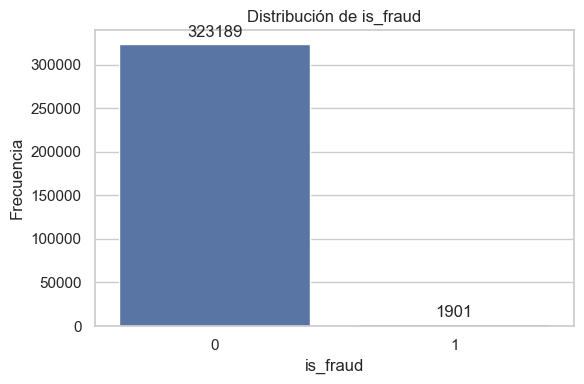

In [28]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(6, 4))

ax = sns.countplot(x="is_fraud", data = df_final)

plt.title("Distribución de is_fraud")

plt.xlabel("is_fraud")

plt.ylabel("Frecuencia")

ax.bar_label(ax.containers[0], padding=3)

plt.tight_layout()

plt.show()

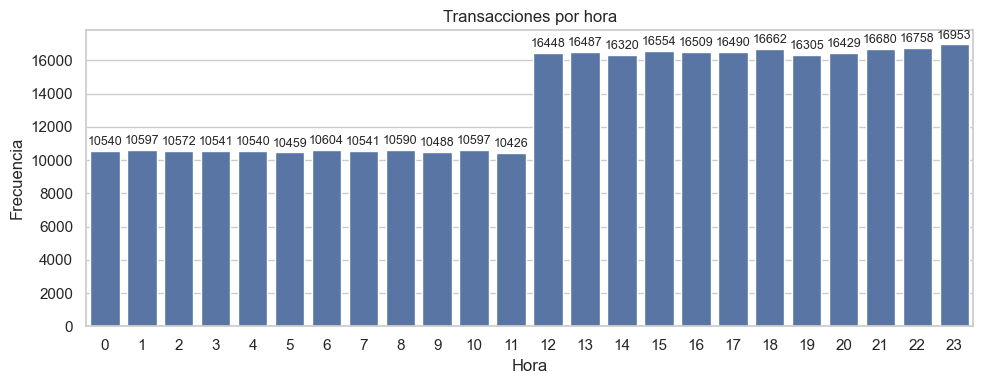

In [30]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10, 4))

ax = sns.countplot(x="hour",data=df_final,order=sorted(df_final["hour"].unique()))

plt.title("Transacciones por hora")

plt.xlabel("Hora")

plt.ylabel("Frecuencia")

ax.bar_label(ax.containers[0], padding=2, fontsize=9)

plt.tight_layout()

plt.show()

Tratamiento específico de `is_fraud` y `hour`

`is_fraud`: es una variable binaria (0/1), por lo que un histograma no aporta información adicional frente a un recuento directo. Se utiliza un countplot para mostrar claramente el número de transacciones fraudulentas y no fraudulentas, y evidenciar el desbalanceo de clases.

`hour`: aunque sea numérica, representa una variable discreta con categorías naturales (0–23). Un gráfico de barras permite comparar de forma directa cuántas transacciones ocurren en cada hora y detectar patrones horarios de actividad.

### Histogramas

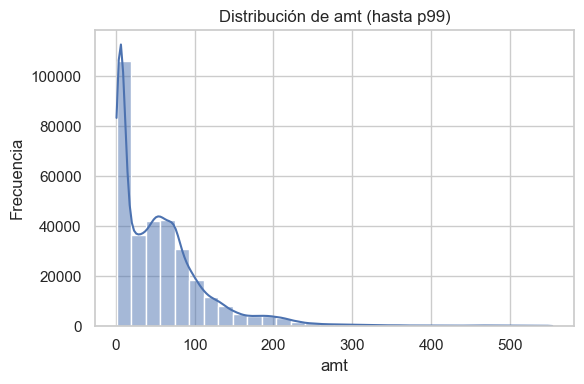

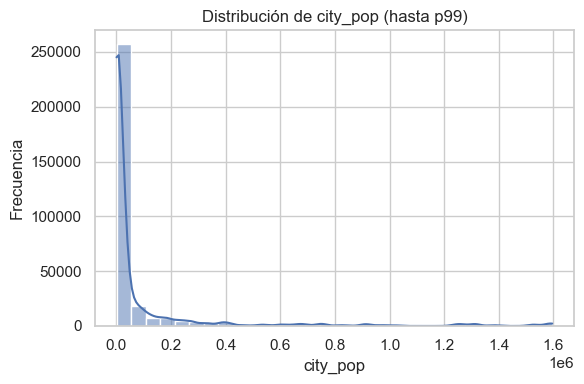

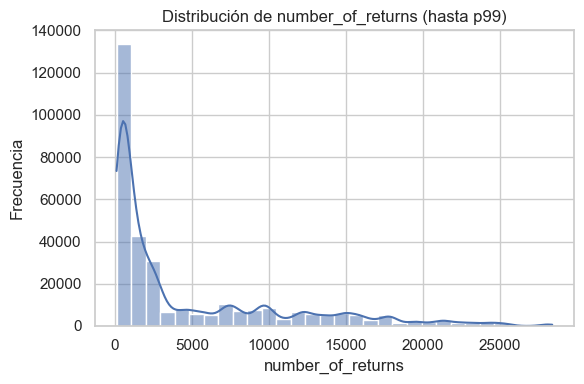

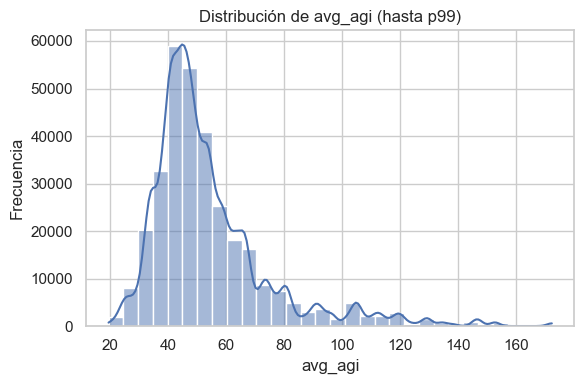

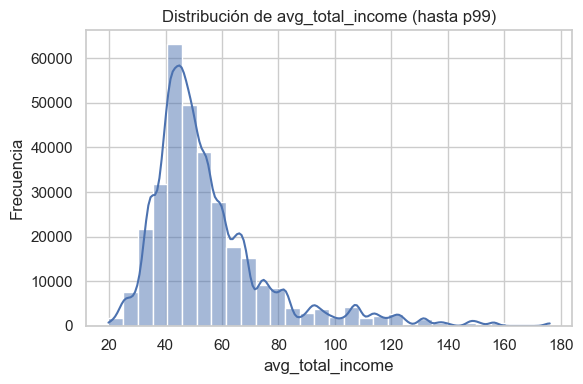

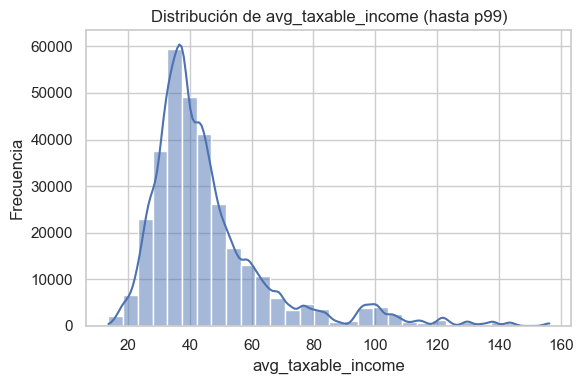

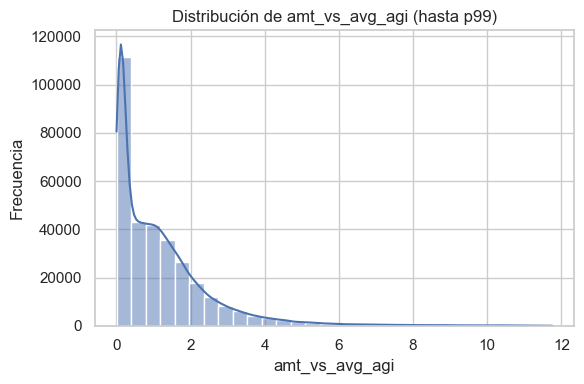

In [64]:
sns.set(style="whitegrid", context="notebook")

cols = ["amt", "city_pop", "number_of_returns", "avg_agi", "avg_total_income", "avg_taxable_income", "amt_vs_avg_agi"]

for col in cols:

    x = df_final[col].dropna()

    p99 = x.quantile(0.99)

    plt.figure(figsize=(6, 4))

    sns.histplot(x[x <= p99], bins=30, stat="count", kde=True)

    plt.title(f"Distribución de {col} (hasta p99)")

    plt.xlabel(col)

    plt.ylabel("Frecuencia")

    plt.tight_layout()

    plt.show()

Las variables `amt`, `city_pop`, `number_of _returns`, `avg_agi`, `avg_total_income`, `avg_taxable_income` y `amt_vs_avg_agi` pueden presentar distribuciones muy asimétricas con cola hacia la derecha y valores extremos. Si se representan sin tratamiento, unos pocos valores muy altos aplastan el histograma y ocultan la forma real donde se concentra la mayoría de observaciones.<br>
Por ello, se aplica un recorte al percentil 99 únicamente para visualización, lo que permite observar mejor el comportamiento típico del conjunto sin perder la referencia de que existen outliers.

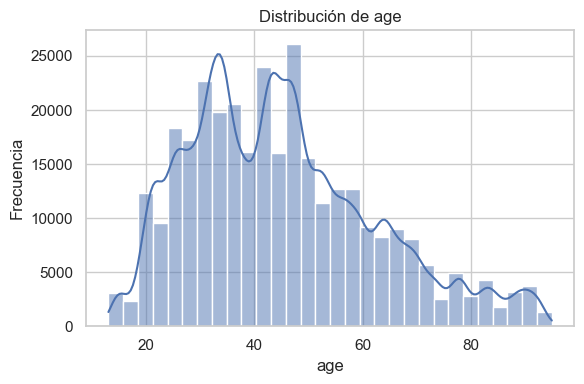

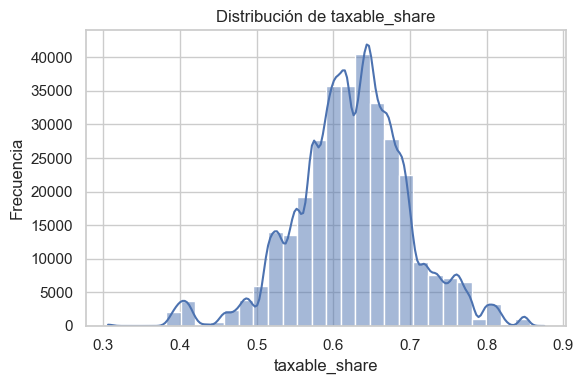

In [31]:
sns.set(style="whitegrid", context="notebook")

smooth_cols = ["age", "taxable_share"]

for col in smooth_cols:

    plt.figure(figsize=(6, 4))

    sns.histplot(df_final[col].dropna(), bins=30, stat="count", kde=True)

    plt.title(f"Distribución de {col}")

    plt.xlabel(col)

    plt.ylabel("Frecuencia")

    plt.tight_layout()
    
    plt.show()

En las variables `age` y `taxable_share` la distribución suele ser más estable y menos dominada por outliers extremos, por esta razón se decide realizar los histogramas de forma separada del resto de variables.

**Observaciones:**

`is_fraud`: La distribución esta fuertemente desbalanceada, la gran mayoría de registros corresponden a 0 (no fraude) con 323.189 frente a una fracción muy reducida de 1 (fraude) con 1.901, lo que supone aproximadamente un 0,58% de fraude.

`hour`: El gráfico muestra un patrón horario claramente desigual. Entre las 00:00 y las 11:00 el volumen se mantiene relativamente estable en torno a 10,4 y 10,6 mil transacciones por hora, mientras que a partir de las 12:00 se observa un salto notable y hasta 16,3 y 17,0 mil transacciones por hora hasta las 23:00. Este comportamiento sugiere una mayor concentración de actividad desde el mediodía hasta la noche.

`amt`: La distribución muestra una concentración muy elevada en importes bajos y un descenso rápido conforme aumenta el valor de la transacción. Se aprecia una cola larga hacia la derecha con operaciones de importe muy alto poco frecuentes, lo que confirma una asimetría positiva marcada y la presencia de valores extremos que pueden comprimir la visualización en escala lineal.

`city_pop`: El histograma evidencia una fuerte concentración en poblaciones bajas y una cola derecha muy pronunciada que se extiende hasta valores próximos a 3 millones. Esto indica que el conjunto incluye mayoritariamente ZIPs asociados a localidades pequeñas o medianas, pero también incorpora grandes áreas urbanas poco frecuentes. La asimetría y la amplitud del rango sugieren una variable altamente heterogénea, donde los valores extremos pueden dominar la representación en escala lineal.

`number_of_returns`: Se observa una gran concentración en valores bajos y una cola hacia la derecha prolongada hacia valores altos. Este patrón sugiere una distribución muy asimétrica, donde la mayoría de códigos postales presenta volúmenes moderados y un grupo reducido concentra niveles de declaraciones significativamente superiores.

`avg_agi`: La distribución se concentra principalmente en un rango central en torno a valores medios, con una caída progresiva hacia la derecha. También muestra una cola hacia la derecha con casos aislados de promedios muy altos, lo que apunta a observaciones atípicas en ciertos códigos postales.

`avg_total_income`: El histograma muestra una concentración clara de observaciones en torno a valores aproximados entre 40 y 70, donde se sitúa la mayor parte del conjunto. A partir de ese tramo, la frecuencia disminuye de forma progresiva y aparece una cola hacia la derecha con un número reducido de ZIPs que presentan promedios de ingreso total significativamente más altos.

`avg_taxable_income`: La distribución se concentra principalmente en torno a valores medios aproxdimadamente entre 30 y 60, con una disminución progresiva hacia la derecha. Además se observa igualmente una cola derecha con casos aislados que alcanzan valores elevados de hasta 400. Esto sugiere la presencia de ZIPs con promedios imponibles atípicos, que pueden influir en la media y justificar el uso de escalas alternativas en visualización.

`amt_vs_avg_agi`: La distribución presenta una marcada asimetría positiva, con una cola prolongada hacia la derecha. La mayor parte de las observaciones se concentra en valores bajos, lo que indica que, la mayoría de transacciones representan una fracción moderada respecto al nivel de renta medio del ZIP, se observa una cola prolongada hacia la derecha, evidenciando la existencia de transacciones relativamente altas frente al contexto económico local. Esto sugiere que esta variable puede ser útil para identificar operaciones atípicas en términos relativos.

`age`: La distribución de edad se concentra principalmente en el rango adulto, con mayor densidad aproximadamente entre los 25 y 60 años. Se aprecia una disminución progresiva a partir de edades más avanzadas, con una cola hacia valores altos, usuarios de mayor edad y menor presencia en edades muy jóvenes. En conjunto, la variable refleja un perfil de usuarios predominantemente adulto y una dispersión moderada, lo que facilita segmentaciones por tramos de edad para comparativas posteriores.

`taxable_share` : La variable muestra una distribución relativamente concentrada alrededor de valores centrales, con un pico principal en torno a 0,62 y 0,66, lo que indica que, para la mayoría de ZIPs, la proporción de ingreso imponible sobre el ingreso total se mantiene en niveles similares.

### Boxplot

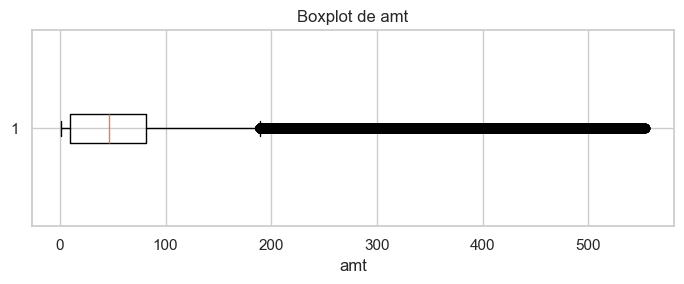

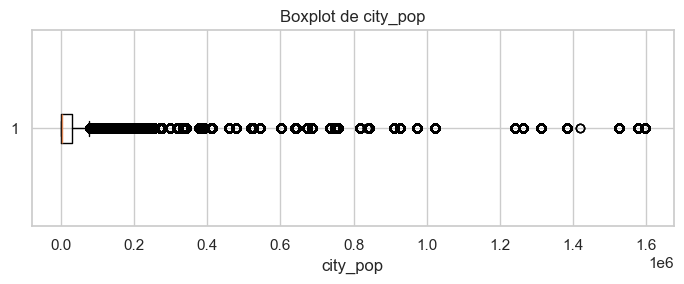

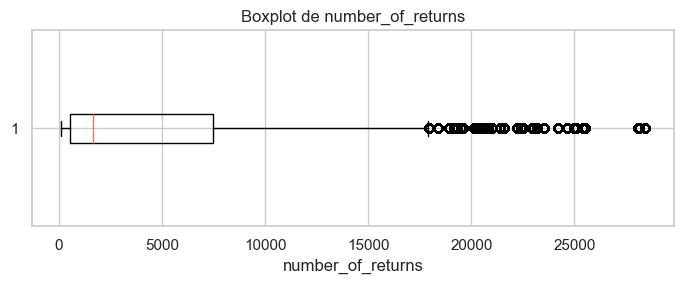

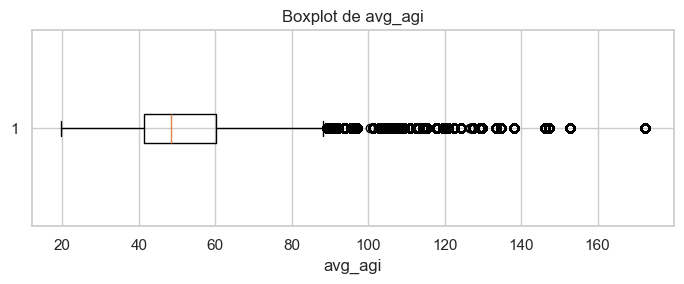

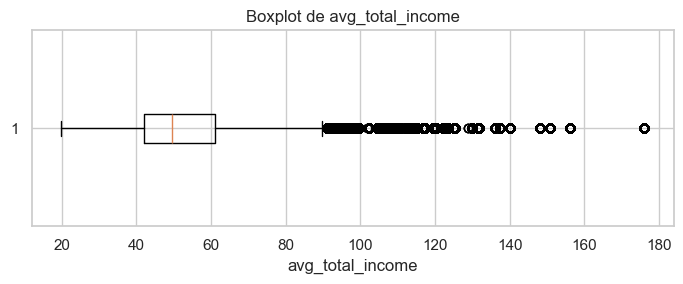

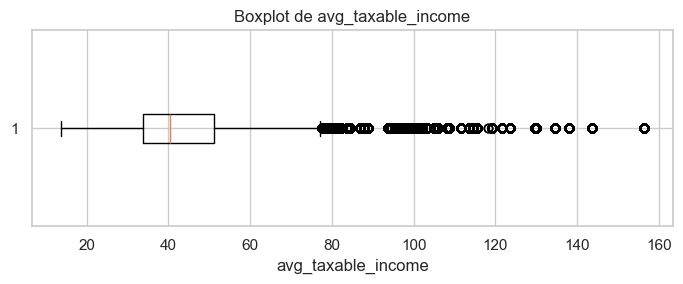

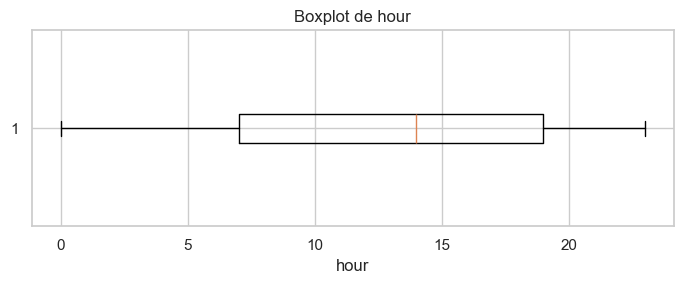

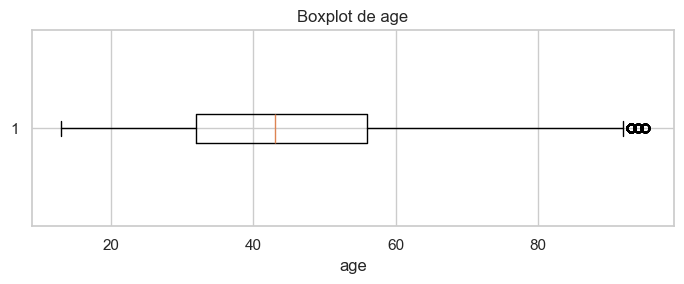

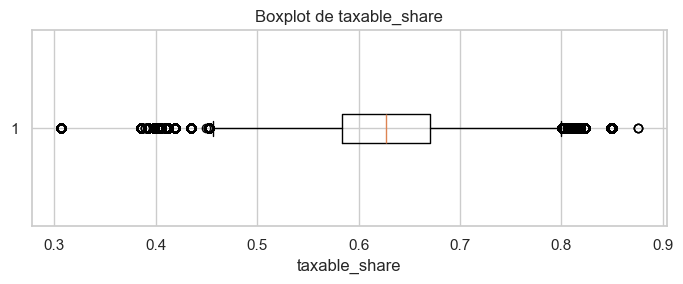

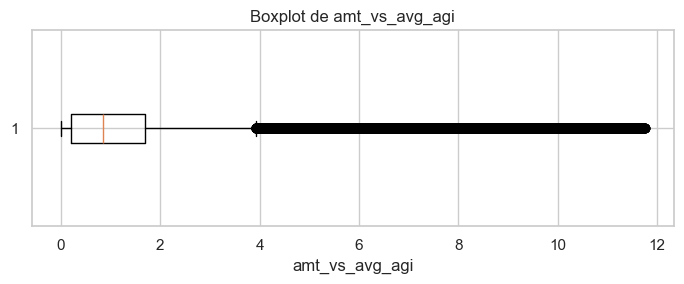

In [67]:
sns.set(style="whitegrid", context="notebook")

box_columns = [c for c in cols_num_final if c != "is_fraud"]

clip_cols = {"amt", "city_pop", "amt_vs_avg_agi", "number_of_returns","avg_agi", "avg_total_income", "avg_taxable_income"}

for col in box_columns:

    x = df_final[col].dropna()

    if col in clip_cols:
        x = x[x <= x.quantile(0.99)]

    plt.figure(figsize=(7, 3))

    plt.boxplot(x, vert=False)

    plt.title(f"Boxplot de {col}")

    plt.xlabel(col)

    plt.tight_layout()

    plt.show()


Se excluye la variable `is_fraud` por no ser adecuada para un boxplot.

`is_fraud`: es una variable binaria 0 y 1, en un boxplot no aporta información adicional relevante porque la distribución, ya que solo puede tomar dos valores.

Se eliminan los valores nulos antes de graficar, aplicando **dropna()** para evitar errores y asegurar que los gráficos representen únicamente observaciones válidas.

Las variables como `amt`, `city_pop`, `amt_vs_avg_agi` pueden tener algunos valores muy altos (outliers), por esta razón, si se dibuja el boxplot con todos los datos, esos valores extremos hacen que la caja quede aplastada y casi no se vea el comportamiento típico, para visualizar mejor, se limita el gráfico al percentil 99. De esta manera el boxplot es más legible y permite ver mejor la mediana y los cuartiles.

**Observaciones:**

`amt`: El boxplot muestra una asimetría positiva marcada. La caja se concentra en importes relativamente bajos, mientras que el bigote superior y la gran cantidad de puntos reflejan muchos valores atípicos altos. Incluso con el rango recortado para visualizar, se observa claramente que hay transacciones de importe excepcional que amplían la dispersión.

`city_pop`: La caja se sitúa muy cerca de valores bajos, y aparece una cola muy larga hacia la derecha con numerosos outliers. Esto confirma que la mayoría de transacciones se asocian a zonas poco pobladas, pero existe un conjunto de registros en grandes áreas urbanas que introduce gran variabilidad.

`number_of_returns`: Se observa una distribución con gran dispersión y clara asimetría positiva. La mediana está muy por debajo del extremo superior, y aparecen múltiples outliers altos, lo que indica que la mayoría de ZIPs tiene volúmenes moderados de declaraciones, pero hay ZIPs con actividad fiscal mucho mayor.

`avg_agi`: El rango central se concentra en valores moderados, pero hay numerosos outliers hacia valores altos. Esto sugiere que, aunque el patrón típico de renta media por declaración es relativamente estable, existen ZIPs con niveles de renta promedio inusualmente elevados que estiran la distribución.

`avg_total_income`: La caja está centrada en valores moderados, se observan outliers altos que indican ZIPs con ingresos totales promedio significativamente superiores al resto, también se observa que la distribución es asimétrica hacia la derecha.

`avg_taxable_income`: La caja se sitúa en niveles inferiores respecto a `avg_agi` y `avg_total_income`, lo que es coherente porque el ingreso imponible suele ser una parte del total. Aun así, se observan outliers altos, indicando ZIPs con ingreso imponible promedio excepcionalmente elevado.

`hour`: El boxplot muestra una distribución amplia entre 0 y 23 con un centro alrededor de la mediana. No se aprecian outliers relevantes, la caja refleja que el rango central de actividad se concentra en horas diurnas, entre mañana y tarde-noche.

`age`: La distribución se concentra en edades adultas, además muestra una ligera cola hacia edades más altas. Se observan algunos outliers en edades avanzadas, indicando pocos casos muy por encima del rango típico.

`taxable_share`: La caja es relativamente estrecha y está centrada alrededor de 0,63, lo que indica baja dispersión en el comportamiento central. Se observan outliers tanto por debajo de 0,5 como por encima de 0,8, que representan ZIPs con ingresos menos habituales, aunque son casos minoritarios.

`amt_vs_avg_agi`: El boxplot evidencia una asimetría positiva muy fuerte, aparecen numerosos outliers altos, lo que indica transacciones que son excepcionalmente grandes.

## Análisis univariante de variables categóricas

Se separan las variables categóricas en dos grupos baja y alta cardinalidad para que el análisis sea más interpretable y representativo.

En las variables de baja cardinalidad, se analiza la distribución completa o casi completa, ya que cada categoría tiene suficiente presencia y las comparaciones son claras.

En las variables de alta cardinalidad, existen cientos o miles de valores distintos. Si se intenta mostrar todo, el resultado sería ilegible, lo que puede llevar a interpretaciones poco fiables. Por eso, en estos casos se analiza el Top 10 por frecuencia y se acompaña de métricas como el número de categorías únicas y la concentración, para entender si la distribución está concentrada en pocos valores o dispersa en muchos.

### Frecuencias y proporciones

In [33]:
cat_baja_car = ["gender","day_of_week","moment_of_day","age_group","income_level","state","category"]

for col in cat_baja_car:

    print(f"\nColumna: {col}")

    display(df_final[col].value_counts().head(10))
    
    display((df_final[col].value_counts(normalize=True).head(10) * 100).round(2))


Columna: gender


gender
Female    175934
Male      149156
Name: count, dtype: int64

gender
Female    54.12
Male      45.88
Name: proportion, dtype: float64


Columna: day_of_week


day_of_week
Monday       63890
Sunday       62834
Saturday     50756
Tuesday      39851
Friday       38200
Thursday     36923
Wednesday    32636
Name: count, dtype: int64

day_of_week
Monday       19.65
Sunday       19.33
Saturday     15.61
Tuesday      12.26
Friday       11.75
Thursday     11.36
Wednesday    10.04
Name: proportion, dtype: float64


Columna: moment_of_day


moment_of_day
afternoon        82318
evening          65886
night            52790
late night       50391
morning          42101
early morning    31604
Name: count, dtype: int64

moment_of_day
afternoon        25.32
evening          20.27
night            16.24
late night       15.50
morning          12.95
early morning     9.72
Name: proportion, dtype: float64


Columna: age_group


age_group
26-35    76165
36-45    67524
46-55    61617
56-65    37517
18-25    32820
66-75    22057
76-85    12985
86+       9004
<18       5401
Name: count, dtype: int64

age_group
26-35    23.43
36-45    20.77
46-55    18.95
56-65    11.54
18-25    10.10
66-75     6.78
76-85     3.99
86+       2.77
<18       1.66
Name: proportion, dtype: float64


Columna: income_level


income_level
low             81542
upper-middle    81527
lower-middle    81210
high            80811
Name: count, dtype: int64

income_level
low             25.08
upper-middle    25.08
lower-middle    24.98
high            24.86
Name: proportion, dtype: float64


Columna: state


state
Texas           25556
Pennsylvania    20538
New York        16197
Illinois        14716
Florida         14087
California      13196
Ohio            11836
Alabama          9224
Virginia         8783
Kentucky         8740
Name: count, dtype: int64

state
Texas           7.86
Pennsylvania    6.32
New York        4.98
Illinois        4.53
Florida         4.33
California      4.06
Ohio            3.64
Alabama         2.84
Virginia        2.70
Kentucky        2.69
Name: proportion, dtype: float64


Columna: category


category
Gas_transport     31941
Grocery_pos       30995
Home              30984
Shopping_pos      29556
Kids_pets         28177
Shopping_net      24252
Entertainment     23619
Food_dining       23224
Personal_care     22748
Health_fitness    21555
Name: count, dtype: int64

category
Gas_transport     9.83
Grocery_pos       9.53
Home              9.53
Shopping_pos      9.09
Kids_pets         8.67
Shopping_net      7.46
Entertainment     7.27
Food_dining       7.14
Personal_care     7.00
Health_fitness    6.63
Name: proportion, dtype: float64

**Observaciones:**

`gender`: La distribución por género es relativamente equilibrada, con una ligera mayoría de transacciones realizadas por Female representan el 54,12%, frente a Male 45,88%. Esta diferencia sugiere una participación algo mayor del segmento femenino en el conjunto de datos, aunque sin un desequilibrio extremo.

`day_of_week`: El volumen de transacciones no es uniforme a lo largo de la semana. El **Lunes** con 63.890 transacciones, representando el 19,65% y el **Domingo** con 62.834 transacciones, representando el 19,33% concentran la mayor actividad, seguidos de el **Sabado** con 50.756 transacciones, representando el 15,61%. En cambio, el **Miercoles** es el día con menor proporción, con un 10,04% y 32.636 transacciones. En conjunto, se observa una mayor concentración al inicio y final de la semana.

`moment_of_day`: La actividad se concentra principalmente por la tarde con el 25,32% y al anocher con el 20,27%, segudio de la noche con un 16,24%, mientras que de madrugada es la franja con menor presencia un 9,72%. Este patrón indica que la mayoría de transacciones ocurre en franjas diurnas y de tarde, con menor actividad en primeras horas del día.

`age_group`: La muestra está dominada por grupos de edad adulta. El tramo 26 a 35 es el más frecuente con un 23,43%, seguido de 36 a 45 con un 20,77% y 46 a 55 con un 18,95%. A partir de los 56 años la proporción desciende progresivamente, y los extremos  menores de 18 con 1,66% y mayores de 86 con 2,77% tienen una presencia reducida. Esto sugiere que el patrón de transacciones está principalmente impulsado por población en edad laboral.

`income_level`: Los cuatro grupos presentan proporciones prácticamente iguales con un 25% cada uno, lo cual es coherente con una segmentación por cuartiles. Esta distribución es positiva para comparativas posteriores, ya que evita grupos con muy poca representación y permite analizar diferencias entre niveles de renta con estabilidad.

`state` **Top 10**: Existe concentración en algunos estados. **Texas** es el estado con mayor volumen con un 7,86%, seguido de **Pennsylvania** con un 6,32% y **New York** con un 4,98%. El resto del Top 10 se sitúa entre 2,7% y 4,5% cada uno. En conjunto, el dataset no está dominado por un único estado, pero sí presenta una mayor representación de ciertos territorios.

`category` **Top 10**: Las categorías están relativamente repartidas, aunque destacan algunas con mayor volumen. **Gas_transport** es la más frecuente con un 9,83%, seguida muy de cerca por **Grocery_pos** y **Home** ambas con un 9,53% y **Shopping_pos** con un 9,09%. El resto del Top 10 se mueve en el rango aproximado de 6,6% a 8,7%. Esto sugiere una distribución bastante diversificada, sin una única categoría dominante, lo que facilita análisis comparativos por tipo de comercio.

In [34]:
cat_grandes = ["merchant", "city", "job", "zip"]

for col in cat_grandes:

    print(f"\nColumna: {col}")

    print("Categorías únicas:", df_final[col].nunique(dropna=False))

    top_counts = df_final[col].value_counts(dropna=False).head(10)

    top_perc = (df_final[col].value_counts(normalize=True, dropna=False).head(10) * 100).round(2)

    display(top_counts)

    display(top_perc)

    top10 = (top_counts.sum() / len(df_final) * 100).round(2)
    
    print("Concentración Top 10 (% del total):", top10)


Columna: merchant
Categorías únicas: 693


merchant
fraud_Kilback LLC                     1161
fraud_Boyer PLC                        906
fraud_Dickinson Ltd                    888
fraud_Cormier LLC                      883
fraud_Schumm PLC                       881
fraud_Kuhn LLC                         856
fraud_Jenkins, Hauck and Friesen       701
fraud_Schiller, Blanda and Johnson     686
fraud_Bartoletti-Wunsch                681
fraud_Rodriguez Group                  671
Name: count, dtype: int64

merchant
fraud_Kilback LLC                     0.36
fraud_Boyer PLC                       0.28
fraud_Dickinson Ltd                   0.27
fraud_Cormier LLC                     0.27
fraud_Schumm PLC                      0.27
fraud_Kuhn LLC                        0.26
fraud_Jenkins, Hauck and Friesen      0.22
fraud_Schiller, Blanda and Johnson    0.21
fraud_Bartoletti-Wunsch               0.21
fraud_Rodriguez Group                 0.21
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 2.56

Columna: city
Categorías únicas: 760


city
Phoenix         1593
San Antonio     1556
Meridian        1531
Warren          1370
Thomas          1360
Cleveland       1355
Naples          1277
Indianapolis    1262
Burbank         1245
Brandon         1244
Name: count, dtype: int64

city
Phoenix         0.49
San Antonio     0.48
Meridian        0.47
Warren          0.42
Thomas          0.42
Cleveland       0.42
Naples          0.39
Indianapolis    0.39
Burbank         0.38
Brandon         0.38
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 4.24

Columna: job
Categorías únicas: 463


job
Designer, Ceramics/Pottery             2496
Financial Adviser                      2302
It Trainer                             2297
Environmental Consultant               2222
Chartered Public Finance Accountant    2166
Exhibition Designer                    2123
Copywriter, Advertising                2119
Materials Engineer                     1989
Agricultural Consultant                1987
Comptroller                            1974
Name: count, dtype: int64

job
Designer, Ceramics/Pottery             0.77
Financial Adviser                      0.71
It Trainer                             0.71
Environmental Consultant               0.68
Chartered Public Finance Accountant    0.67
Exhibition Designer                    0.65
Copywriter, Advertising                0.65
Materials Engineer                     0.61
Agricultural Consultant                0.61
Comptroller                            0.61
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 6.67

Columna: zip
Categorías únicas: 823


zip
34112    1129
73754    1109
48088    1073
82514    1034
39073     979
05461     970
72042     959
72476     956
38761     956
07060     953
Name: count, dtype: int64

zip
34112    0.35
73754    0.34
48088    0.33
82514    0.32
39073    0.30
05461    0.30
72042    0.29
72476    0.29
38761    0.29
07060    0.29
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 3.11


**Observaciones:**

`merchant`: La variable presenta alta cardinalidad con 693 comercios distintos y una distribución muy dispersa. El comercio más frecuente es **fraud_Kilback LLC** con 1.161 transacciones, seguido de **fraud_Boyer PLC** con 906 y **fraud_Dickinson Ltd** con 888. Sin embargo, la concentración del Top 10 es únicamente del 2,56%, lo que confirma que la mayoría de transacciones se reparte entre muchos comercios con baja frecuencia. Para análisis posteriores es recomendable aplicar un umbral mínimo de volumen por merchant para obtener resultados estables.

`city`: Se observa una cardinalidad elevada con 760 ciudades, con una concentración moderada. La ciudad con más registros es **Phoenix** con 1.593 transacciones, seguida de **San Antonio** con 1.556 y **Meridian** con 1.531. A pesar de ello, el Top 10 solo concentra el 4,24% del total, lo que indica que las transacciones están ampliamente distribuidas entre muchas ciudades. Esto sugiere que, para comparativas más robustas, puede ser más conveniente trabajar por niveles geográficos agregados, como por ejemplo, `state` o filtrar ciudades con suficiente número de observaciones.

`job`: La variable incluye 463 ocupaciones distintas. La ocupación más frecuente es **Designer, Ceramics/Pottery** con 2.496, seguida de **Financial Adviser** 2.302 e **IT Trainer** con 2.297. El Top 10 representa el 6,67% de las transacciones, lo que indica cierta concentración, aunque sigue existiendo una elevada diversidad de categorías con frecuencias bajas. Para análisis posteriores por ocupación conviene limitarse a las más representativas o aplicar un mínimo de registros por categoría.

`zip`: La variable zip presenta una granularidad geográfica muy alta, con 823 códigos postales distintos. El ZIP con mayor frecuencia es el **34112** con 1.129, seguido de **73754** con 1.109 y **48088** con 1.073. La concentración del Top 10 es del 3,11%, lo que evidencia una distribución muy fragmentada. En análisis bivariantes fraude por ZIP es importante imponer un umbral mínimo de transacciones por código postal o utilizar agregaciones por estado, para evitar conclusiones inestables por una baja muestra.

### Gráficos de barras

Se separan en dos grupos porque no todas las variables categóricas tienen el mismo número de categorías.

Las variables de **cat_small** contiene pocas categorías y por ello sus gráficos son fáciles de interpretar, y el Top 10 suele representar prácticamente toda la distribución.

Las variables **cat_big** agrupan muchas categorías, la distribución está muy dispersa y graficarlas completas sería ilegible; por eso se muestran solo las categorías más frecuentes Top 10 para obtener una visión clara y comparable.

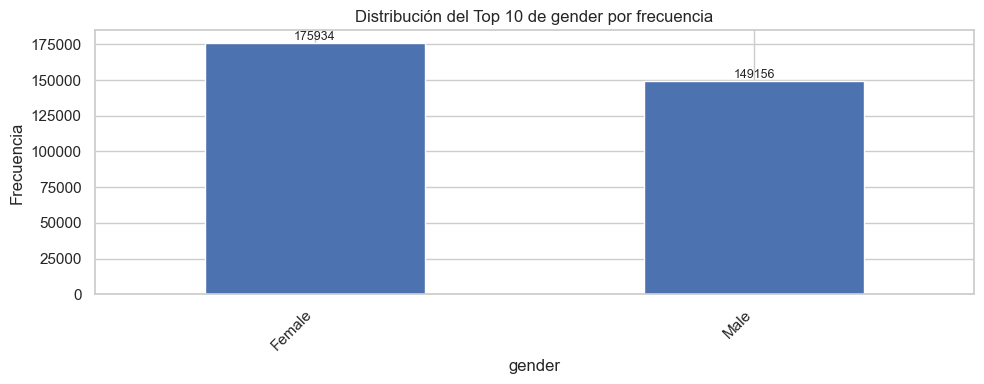

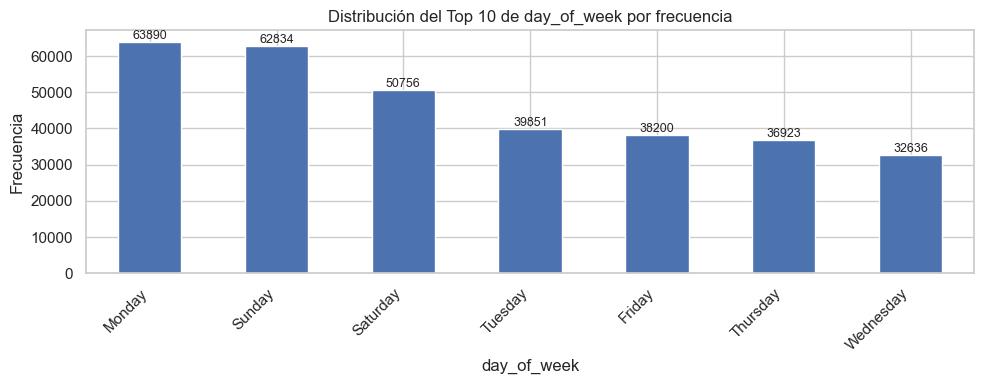

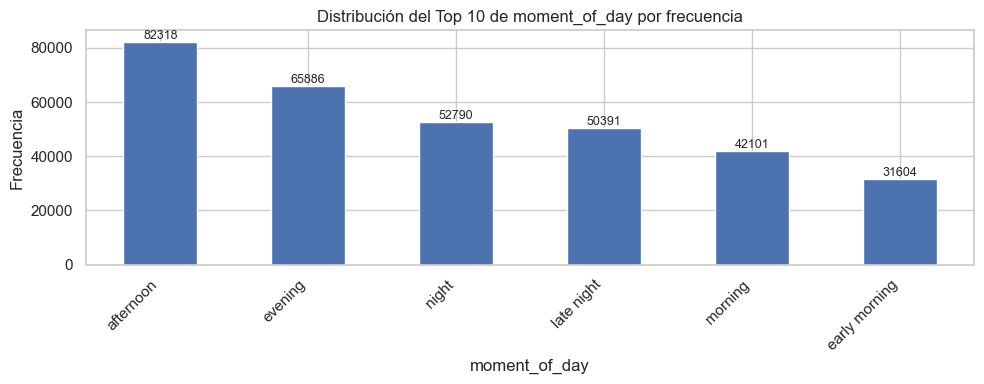

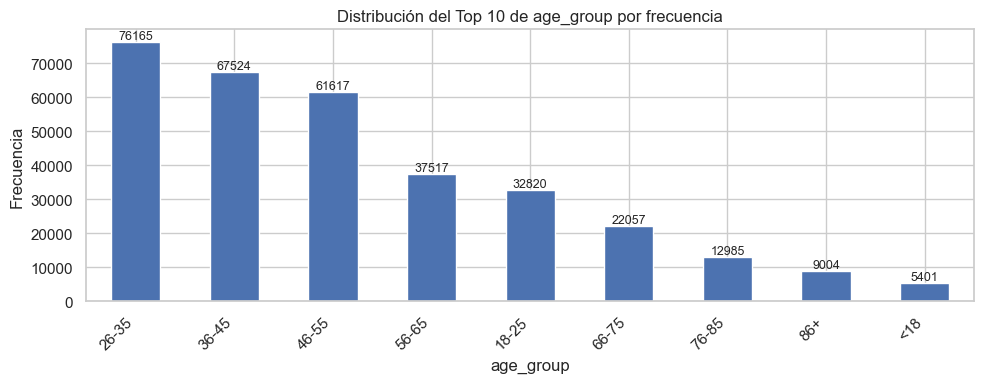

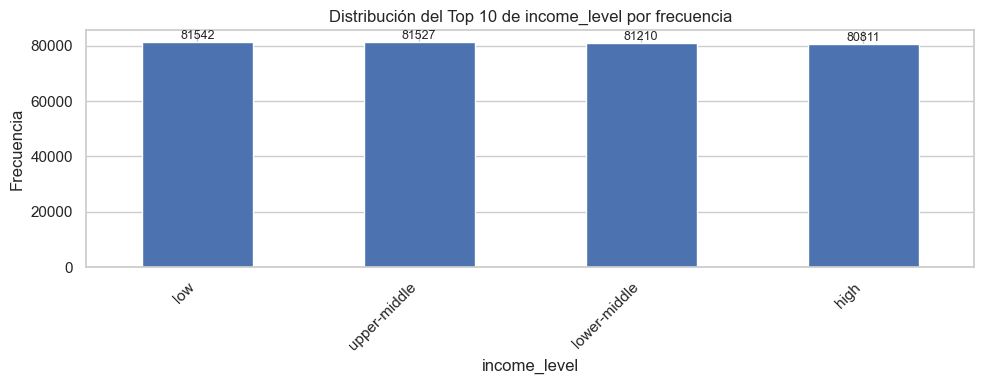

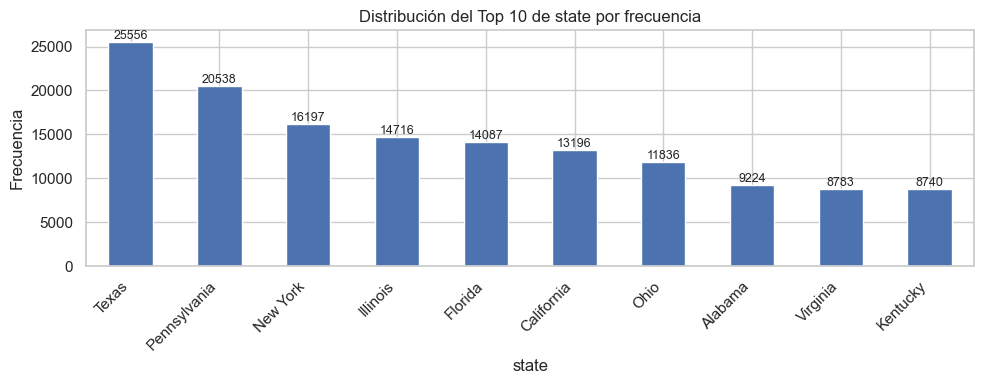

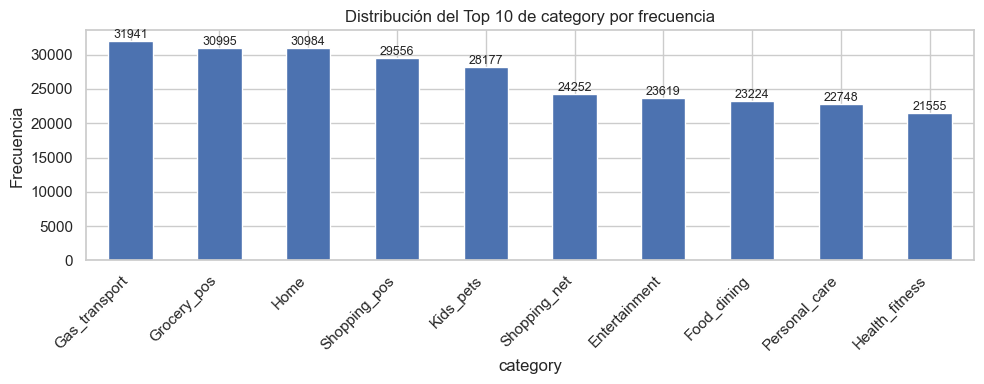

In [37]:
sns.set(style="whitegrid", context="notebook")

cat_small = ["gender", "day_of_week", "moment_of_day", "age_group", "income_level", "state", "category"]

for col in cat_small:

    top_counts = df_final[col].value_counts(dropna=False).head(10)

    ax = top_counts.plot(kind="bar", figsize=(10, 4))

    plt.title(f"Distribución del Top 10 de {col} por frecuencia")
    
    plt.ylabel("Frecuencia")
    
    plt.xticks(rotation=45, ha="right")

    for i, v in enumerate(top_counts):

        ax.text(i, v, str(int(v)), ha="center", va="bottom", fontsize=9)

    plt.tight_layout()

    plt.show()

**Observaciones:**

`gender` **Top 10**: El gráfico confirma una distribución relativamente equilibrada por género, con una ligera mayor presencia de Female frente a Male. Aunque existe diferencia, no es lo suficientemente extrema como para considerar un sesgo fuerte de representación en el conjunto.

`day_of_week` **Top 10**: Se observa un mayor volumen de transacciones los **Lunes** y **Domingos**, seguidos de los **Sabados**, mientras que los **Miercoles** registra la menor frecuencia. En conjunto, la actividad se concentra más al inicio y final de la semana, lo que puede influir en análisis posteriores.

`moment_of_day` **Top 10**: La mayor parte de las transacciones ocurre por la **tarde** y al **anochecer**, con un volumen intermedio de noche. Las franjas de  por la **mañana** y especialmente las **primeras horas del día** presentan menor actividad. Esto sugiere un patrón de uso predominantemente diurno y de tarde.

`age_group` **Top 10**: El gráfico muestra que la mayor concentración de transacciones se da en edades adultas, destacando **26 a 35**, **36 a 45** y **46 a 55**. A partir de **56 a 65** el volumen disminuye y los tramos de edad más extremos **menors de 18** y **mayores de 86** representan una fracción pequeña del total. Esto indica que el comportamiento transaccional está dominado por población en edad laboral.

`income_level` **Top 10**: Los cuatro niveles aparecen con alturas muy similares, lo cual es consistente con una clasificación por cuartiles. Esta distribución uniforme facilita comparaciones posteriores entre niveles de renta, al no existir grupos infrarepresentados.

`state` **Top 10**: Se aprecia concentración moderada en algunos estados, con **Texas** como el más representado, seguido de **Pennsylvania** y **New York**. Aun así, el resto del Top 10 mantiene volúmenes relativamente cercanos, lo que sugiere una distribución geográfica amplia sin dominio absoluto de un único estado.

`category` **Top 10**: Las categorías presentan una distribución relativamente repartida, aunque destacan **Gas_transport**, **Grocery_pos** y **Home** como las más frecuentes. Las diferencias entre las primeras posiciones no son muy grandes, lo que indica diversidad en los tipos de gasto y permite análisis comparativos por categoría sin depender de un único tipo de transacción.


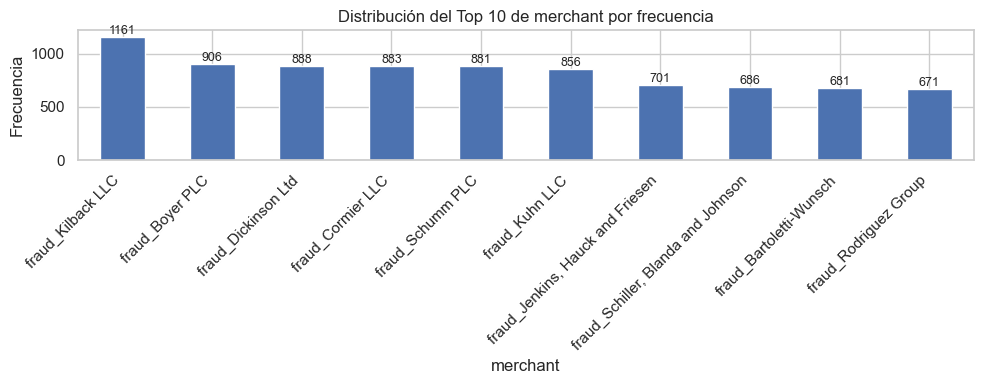

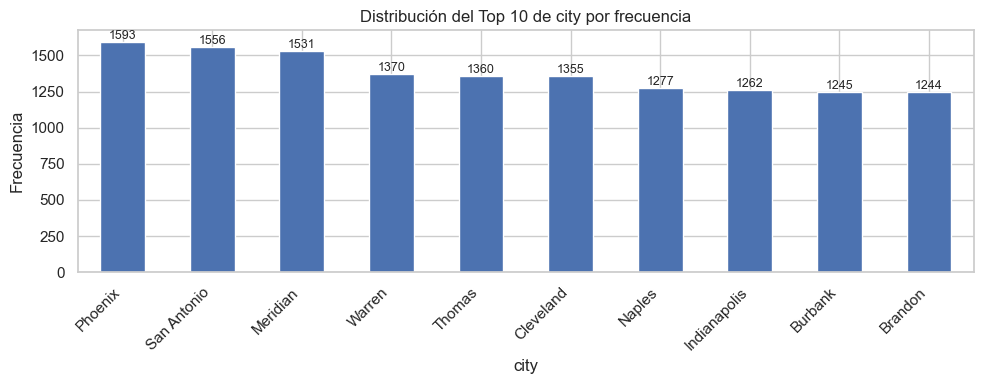

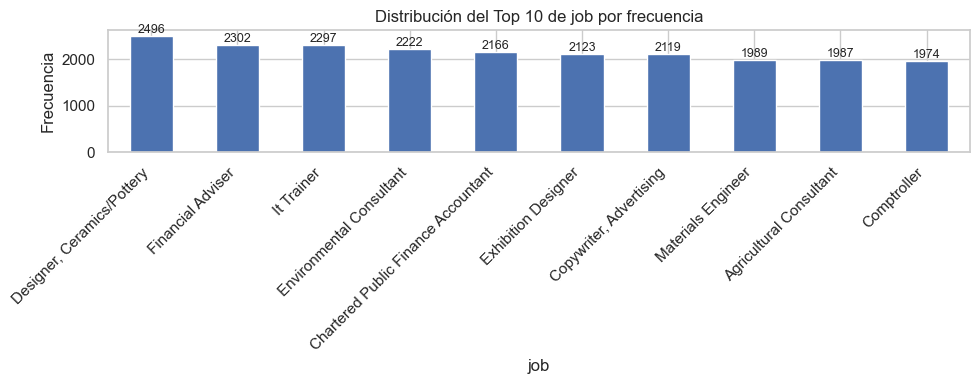

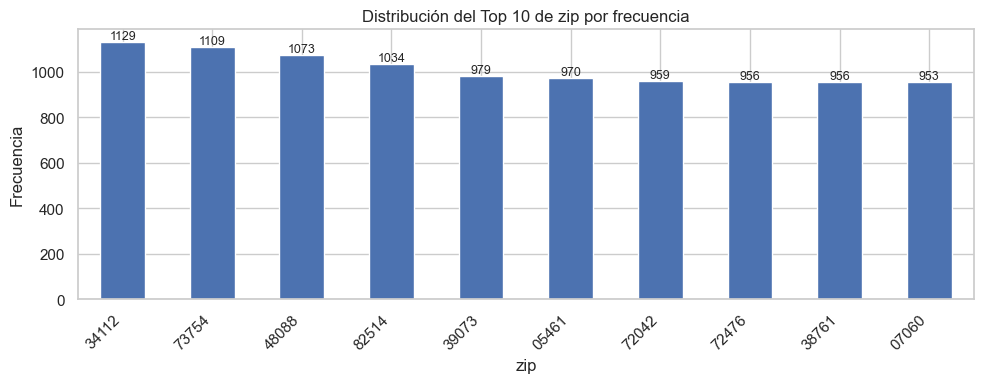

In [38]:
sns.set(style="whitegrid", context="notebook")

cat_big = ["merchant", "city", "job", "zip"]

for col in cat_big:

    top_counts = df_final[col].value_counts(dropna=False).head(10)

    ax = top_counts.plot(kind="bar", figsize=(10, 4))

    plt.title(f"Distribución del Top 10 de {col} por frecuencia")

    plt.ylabel("Frecuencia")

    plt.xticks(rotation=45, ha="right")

    for i, v in enumerate(top_counts):

        ax.text(i, v, str(int(v)), ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    
    plt.show()

**Observaciones:**

`merchant` **Top 10**: El gráfico muestra que los comercios más frecuentes tienen volúmenes relativamente cercanos entre 650 y 1.160 transacciones. Destaca **fraud_Kilback LLC** como el merchant con mayor número de registros, pero sin una diferencia extrema respecto al resto del Top 10. En conjunto, el patrón sugiere una baja concentración y una distribución dispersa entre muchos merchants, por lo que para análisis posteriores por comercio conviene aplicar un umbral mínimo de transacciones.

`city` Top 10: Las diez ciudades con mayor frecuencia presentan recuentos muy similares entre 1.240 y 1.600. **Phoenix**, **San Antonio** y **Meridian** encabezan la lista, pero ninguna domina claramente. Esto indica que la distribución por ciudad está bastante repartida y que el análisis por ciudad puede requerir filtros de tamaño o agregación por estado para obtener conclusiones robustas.

`job` **Top 10**: Las ocupaciones más frecuentes se concentran en un rango moderado, entre 1.970 y 2.500. **Designer, Ceramics/Pottery** es la más representada, seguida de **Financial Adviser** e **IT Trainer**, con diferencias relativamente pequeñas entre categorías. Esto sugiere diversidad ocupacional y ausencia de una categoría claramente dominante.

`zip` **Top 10**: Los ZIP del Top 10 aparecen con frecuencias próximas entre sí de 950 a 1.130, lo que confirma que no hay un conjunto reducido de códigos postales que concentre gran parte de las transacciones. La distribución geográfica a este nivel es fragmentada, por lo que cualquier análisis por ZIP ,especialmente tasas de fraude, debería incorporar un mínimo de transacciones por ZIP.

## Análisis bivariante de variables numéricas vs `is_fraud`

### Boxplots agrupados por valor de `is_fraud`

Se proce a separar las variables en dos grupos porque no todas las variables numéricas tienen la misma forma de distribución ni el mismo impacto de los valores extremos en los gráficos.

El primer grupo `num_cols` contiene todas las variables numéricas que se van a analizar frente a `is_fraud`. Esta es la lista base de variables que queremos comparar entre transacciones fraudulentas y no fraudulentas.

El segundo grupo `clip_cols` es un subconjunto de `num_cols` formado por variables con cola larga y outliers muy altos. En estas variables, si se dibuja el boxplot con todos los valores, los outliers estiran la escala y la caja queda muy aplastada, impidiendo ver bien la mediana y el rango intercuartílico. <br> Por eso, a las variables incluidas en clip_cols se les aplica un recorte al percentil 99 únicamente para mejorar la visualización. 

<Figure size 600x400 with 0 Axes>

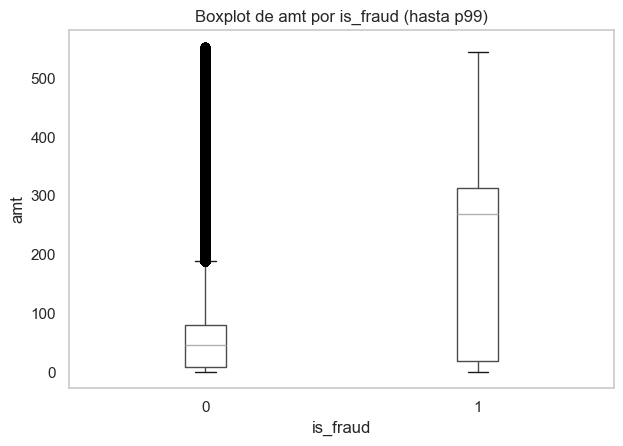

<Figure size 600x400 with 0 Axes>

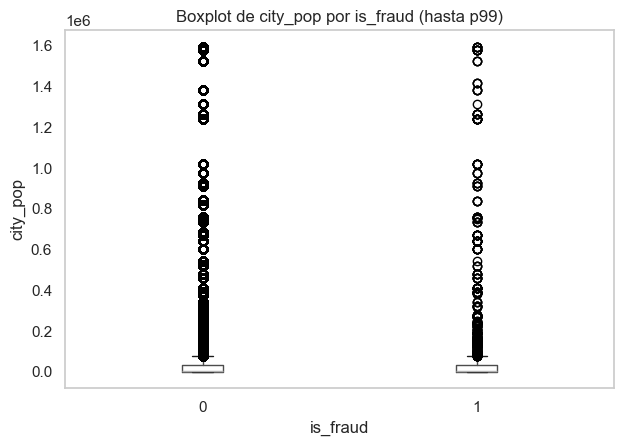

<Figure size 600x400 with 0 Axes>

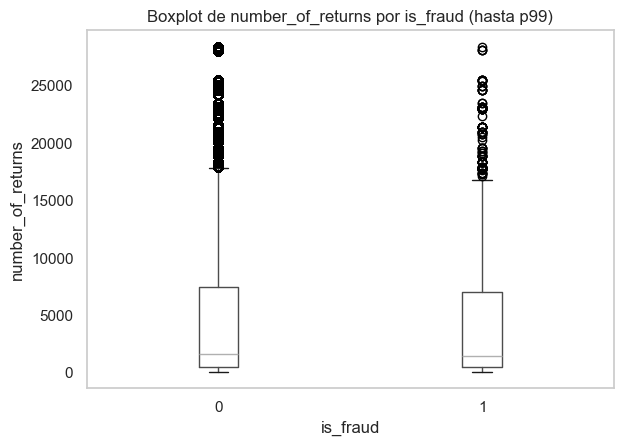

<Figure size 600x400 with 0 Axes>

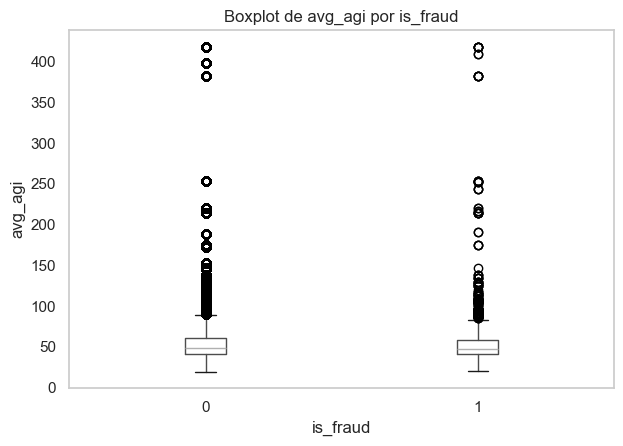

<Figure size 600x400 with 0 Axes>

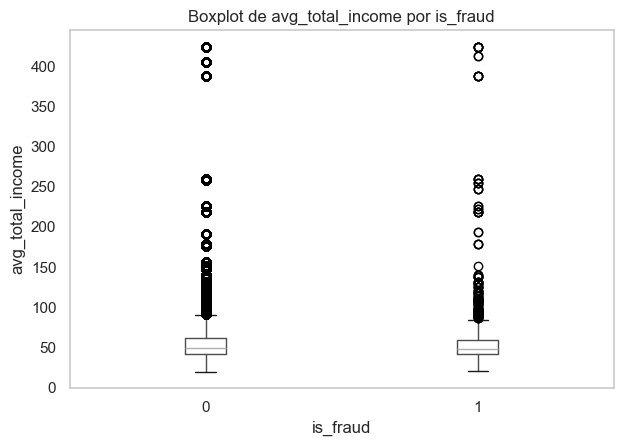

<Figure size 600x400 with 0 Axes>

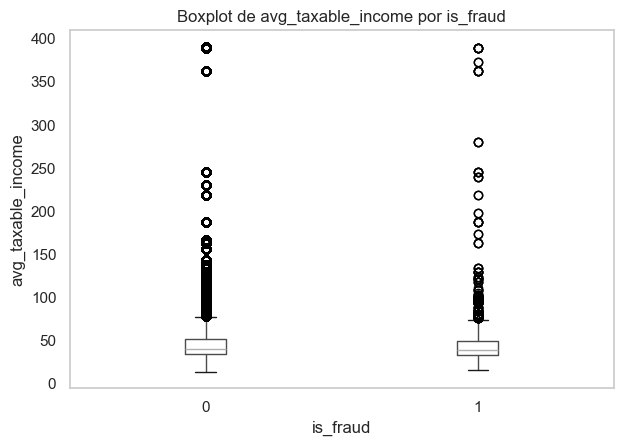

<Figure size 600x400 with 0 Axes>

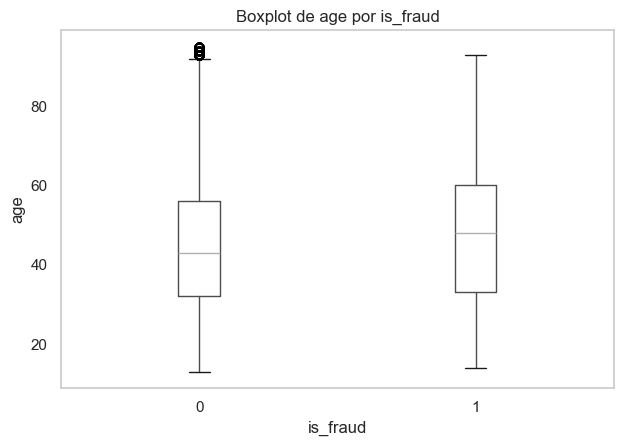

<Figure size 600x400 with 0 Axes>

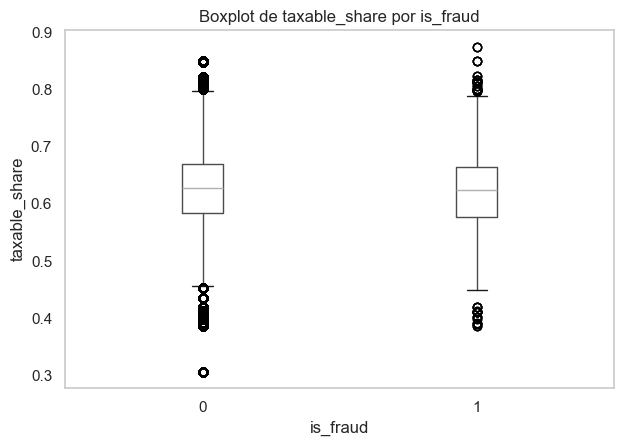

<Figure size 600x400 with 0 Axes>

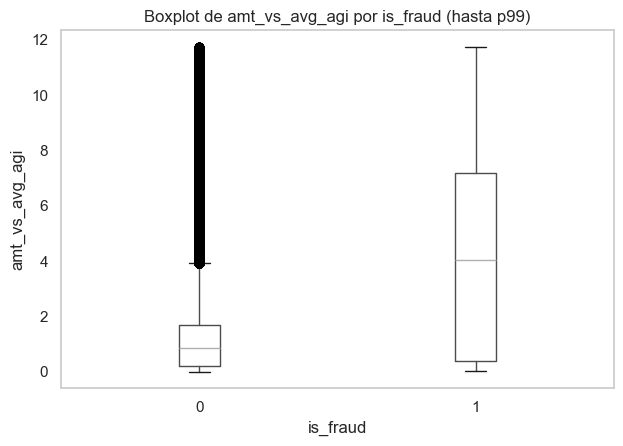

In [ ]:
sns.set(style="whitegrid", context="notebook")

num_cols = ["amt", "city_pop", "number_of_returns", "avg_agi", "avg_total_income","avg_taxable_income", "age", "taxable_share", "amt_vs_avg_agi"]

clip_cols = {"amt", "city_pop", "amt_vs_avg_agi", "number_of_returns"}

for col in num_cols:

    df_plot = df_final[["is_fraud", col]].dropna()

    title_extra = ""

    if col in clip_cols:

        df_plot = df_plot[df_plot[col] <= df_plot[col].quantile(0.99)]

        title_extra = " (hasta p99)"

    plt.figure(figsize=(6, 4))

    df_plot.boxplot(column=col, by="is_fraud", grid=False)

    plt.title(f"Boxplot de {col} por is_fraud{title_extra}")

    plt.suptitle("")

    plt.xlabel("is_fraud")

    plt.ylabel(col)

    plt.tight_layout()

    plt.show()

**Observaciones:**

`amt`: Se observa una diferencia muy marcada entre clases. Las transacciones fraudulentas (1) presentan una mediana y un rango intercuartílico claramente superiores a las no fraudulentas (0), lo que sugiere que el fraude tiende a concentrarse en importes más altos. Además, incluso tras el recorte al percentil 99, la dispersión en la clase fraudulenta es mayor, indicando mayor variabilidad en los importes asociados a fraude.

`city_pop`: Las dos clases muestran cajas muy similares y muy cercanas a valores bajos, con abundantes outliers en ambos grupos. No se aprecia una separación clara entre fraude y no fraude, lo que sugiere que, por sí sola, la población de la ciudad no discrimina fuertemente entre transacciones fraudulentas y no fraudulentas.

`number_of_returns`: El boxplot presenta una distribución muy asimétrica con muchos valores extremos, pero las medianas y los rangos intercuartílico de ambas clases son parecidos. Esto indica que el volumen de declaraciones por ZIP no muestra una diferencia contundente entre fraude y no fraude en el rango central, aunque hay outliers altos en ambos casos.

`avg_agi`: La distribución es similar entre clases, medianas muy próximas y un rango intercuartílico comparable. Los outliers altos aparecen tanto en fraude como en no fraude. En conjunto, el nivel medio de renta por ZIP no parece diferenciar claramente las transacciones fraudulentas de las no fraudulentas en el comportamiento típico.

`avg_total_income`: Se observa un centro y dispersión muy parecidos para ambas clases, con presencia de outliers altos en los dos grupos. Esto sugiere que el ingreso total promedio del ZIP no aporta una separación evidente entre clases por sí solo.

`avg_total_income`: Se muestra que tanto las transacciones fraudulentas como las no fraudulentas tienen medianas muy similares y un rango intercuartílico prácticamente igual. Además, aparecen valores atípicos altos en ambos grupos, esto indica que el ingreso total promedio del ZIP, por sí solo, no diferencia claramente entre fraude y no fraude.

`age`: Se aprecia una ligera elevación de la mediana en la clase fraudulenta respecto a la no fraudulenta, junto con una dispersión comparable. Esto sugiere que podría existir una tendencia a mayor edad en transacciones fraudulentas, aunque la superposición entre distribuciones es alta y la diferencia no es extrema.

`taxable_share`: Las distribuciones son muy parecidas en ambas clases, con medianas prácticamente iguales alrededor del valor central y una variabilidad similar. Los outliers aparecen en ambos grupos, por lo que esta proporción no parece asociarse de forma clara con el fraude.

`amt_vs_avg_agi`: Se observa una separación muy notable entre, la clase fraudulenta muestra valores relativos mucho más altos, con mediana y un rango intercuartílico claramente superiores. Esto indica que el fraude tiende a ocurrir en transacciones cuyo importe es grande en relación con el nivel de renta promedio del ZIP, convirtiendo esta variable en una de las más informativas en el análisis.

In [41]:
df_final.groupby('is_fraud')[cols_num_final].median().round(2).T

is_fraud,0,1
amt,46.85,362.28
city_pop,4056.00,4046.00
is_fraud,0.00,1.00
number_of_returns,1680.00,1510.00
avg_agi,48.57,47.71
avg_total_income,49.59,48.72
avg_taxable_income,40.44,39.20
hour,14.00,21.00
age,43.00,48.00
taxable_share,0.63,0.62


**Observaciones:**

`amt`: La mediana del importe en transacciones fraudulentas es de 362,28 muy superior a la de no fraude que es de 46,85. Esto indica una asociación clara, el fraude tiende a concentrarse en operaciones de mayor importe, por lo que `amt` es una variable muy relevante para diferenciar ambas clases.

`city_pop`: Las medianas son prácticamente idénticas entre no fraude con 4.056 y fraude con 4.046. Esto sugiere que el tamaño poblacional de la ciudad asociada a la transacción no muestra diferencias relevantes entre clases en el valor central.

`number_of_returns`: La mediana es ligeramente menor en fraude con 1.510 que en no fraude con 1.680. La diferencia existe, pero es moderada, por lo que esta variable por sí sola no parece un factor discriminante fuerte.

`avg_agi`: La mediana en fraude es 47,71 muy similar a la de no fraude 48,57, con una diferencia pequeña. Esto indica que el nivel medio de renta ajustada del ZIP no separa claramente ambas clases en términos centrales.

`avg_total_income`: La mediana en fraude es 48,72 cercana a la de no fraude que es 49,59. La similitud confirma que el ingreso total promedio del ZIP, por sí solo, no aporta una diferenciación clara entre fraude y no fraude.

`avg_taxable_income`: La mediana en fraude es 39,20, ligeramente inferior a la de no fraude con 40,44. La diferencia es pequeña, por lo que el ingreso imponible promedio del ZIP no parece tener un impacto marcado en la distinción entre clases a nivel central.

`hour`: Se observa una diferencia notable, ya que la mediana en no fraude es 14, mientras que en fraude es 21. Esto sugiere que las transacciones fraudulentas tienden a ocurrir con mayor frecuencia en franjas horarias más tardías por la noche, lo que puede ser un patrón relevante a explorar con tasas por hora.

`age`: La mediana de edad es mayor en fraude con 48 que en no fraude con 43. Esto apunta a que, en el valor central, los fraudes se asocian a clientes ligeramente más mayores, aunque habría que confirmarlo con tasas por grupos de edad.

`taxable_share`: La mediana es casi igual en ambas clases con 0,63 en no fraude y 0,62 en fraude. Esto sugiere que la proporción de ingreso imponible sobre el total en el ZIP no presenta diferencias significativas entre fraude y no fraude.

`amt_vs_avg_agi`: La diferencia entre clases es muy clara, ya que la mediana en transacciones fraudulentas es 8,58, frente a 0,86 en no fraude, lo que indica que el fraude se asocia a importes significativamente más altos en relación con la renta media del ZIP. Por ello, esta variable destaca como una de las más útiles para distinguir entre fraude y no fraude en el análisis.

La variable `is_fraud` no se interpreta aquí porque es la variable objetivo.

## Análisis bivariante de variables catégoricas vs `is_fraud`

### Tablas de contingencia

In [42]:
for col in cols_cate_final:

    print(f"\nRelación entre {col} e is_fraud")

    tabla_counts = pd.crosstab(df_final[col], df_final["is_fraud"])

    tabla_prct = pd.crosstab(df_final[col], df_final["is_fraud"], normalize="index") * 100

    tabla_final = pd.concat([tabla_counts.add_prefix("nº_"), tabla_prct.add_prefix("%_")], axis=1)

    display(tabla_final.head(15).round(2))


Relación entre merchant e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
merchant,,,,
fraud_Abbott-Rogahn,451,1,99.78,0.22
fraud_Abbott-Steuber,446,6,98.67,1.33
fraud_Abernathy and Sons,437,0,100.00,0.00
fraud_Abshire PLC,471,3,99.37,0.63
"fraud_Adams, Kovacek and Kuhlman",252,0,100.00,0.00
fraud_Adams-Barrows,462,0,100.00,0.00
"fraud_Altenwerth, Cartwright and Koss",474,7,98.54,1.46
fraud_Altenwerth-Kilback,622,1,99.84,0.16
fraud_Ankunding LLC,491,1,99.80,0.20



Relación entre category e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
category,,,,
Entertainment,23553,66,99.72,0.28
Food_dining,23179,45,99.81,0.19
Gas_transport,31805,136,99.57,0.43
Grocery_net,11962,32,99.73,0.27
Grocery_pos,30533,462,98.51,1.49
Health_fitness,21532,23,99.89,0.11
Home,30921,63,99.80,0.20
Kids_pets,28116,61,99.78,0.22
Misc_net,15533,242,98.47,1.53



Relación entre gender e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
gender,,,,
Female,174943,991,99.44,0.56
Male,148246,910,99.39,0.61



Relación entre city e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
city,,,,
Acworth,631,4,99.37,0.63
Adams,150,0,100.00,0.00
Afton,643,2,99.69,0.31
Akron,153,0,100.00,0.00
Albany,0,4,0.00,100.00
Albuquerque,319,8,97.55,2.45
Aledo,290,3,98.98,1.02
Alexandria,311,5,98.42,1.58
Allenhurst,296,1,99.66,0.34



Relación entre state e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
state,,,,
Alabama,9164,60,99.35,0.65
Alaska,591,4,99.33,0.67
Arizona,4032,35,99.14,0.86
Arkansas,6951,52,99.26,0.74
California,13121,75,99.43,0.57
Colorado,2269,18,99.21,0.79
Connecticut,1912,8,99.58,0.42
District of Columbia,759,7,99.09,0.91
Florida,14015,72,99.49,0.51



Relación entre zip e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
zip,,,,
01257,610,0,100.00,0.00
01330,296,3,99.00,1.00
01535,125,3,97.66,2.34
01545,309,0,100.00,0.00
01612,147,3,98.00,2.00
01843,789,5,99.37,0.63
01844,645,2,99.69,0.31
02180,160,2,98.77,1.23
02630,651,7,98.94,1.06



Relación entre job e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
job,,,,
Academic Librarian,357,3,99.17,0.83
"Accountant, Chartered",0,3,0.00,100.00
"Accountant, Chartered Certified",0,3,0.00,100.00
"Accountant, Chartered Public Finance",747,1,99.87,0.13
Accounting Technician,950,8,99.16,0.84
Acupuncturist,490,3,99.39,0.61
Administrator,1076,3,99.72,0.28
"Administrator, Arts",165,1,99.40,0.60
"Administrator, Charities/Voluntary Organisations",745,1,99.87,0.13



Relación entre day_of_week e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
day_of_week,,,,
Friday,37927,273,99.29,0.71
Monday,63582,308,99.52,0.48
Saturday,50466,290,99.43,0.57
Sunday,62518,316,99.50,0.50
Thursday,36674,249,99.33,0.67
Tuesday,39613,238,99.40,0.60
Wednesday,32409,227,99.30,0.70



Relación entre moment_of_day e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
moment_of_day,,,,
afternoon,82213,105,99.87,0.13
early morning,31560,44,99.86,0.14
evening,65816,70,99.89,0.11
late night,49424,967,98.08,1.92
morning,42057,44,99.90,0.10
night,52119,671,98.73,1.27



Relación entre age_group e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
age_group,,,,
<18,5367,34,99.37,0.63
18-25,32620,200,99.39,0.61
26-35,75819,346,99.55,0.45
36-45,67262,262,99.61,0.39
46-55,61207,410,99.33,0.67
56-65,37202,315,99.16,0.84
66-75,21920,137,99.38,0.62
76-85,12859,126,99.03,0.97
86+,8933,71,99.21,0.79



Relación entre income_level e is_fraud


is_fraud,nº_0,nº_1,%_0,%_1
income_level,,,,
low,81023,519,99.36,0.64
lower-middle,80730,480,99.41,0.59
upper-middle,81050,477,99.41,0.59
high,80386,425,99.47,0.53


**Observaciones:**

`merchant`: En los ejemplos mostrados, la mayoría de comercios presentan tasas de fraude muy bajas, habitualmente por debajo del 2%. Aun así, el patrón general es de fraude minoritario y con diferencias moderadas entre comercios. Para interpretar merchants con valores 0% conviene recordar que dependen del volumen de transacciones de cada categoría.

`category`: Se aprecian diferencias claras por tipo de comercio. Destacan categorías con una proporción de fraude más elevada como **Shopping_net** con 1,64%, **Misc_net** con 1,53% y **Grocery_pos** con 1,49%. En cambio, categorías como **Health_fitness** con 0,11% o **Food_dining** con 0,19% presentan tasas notablemente menores. Esto sugiere que el riesgo de fraude varía según el tipo de compra, siendo más alto en algunas categorías concretas.

`gender`: Las tasas de fraude son muy similares entre géneros, con una ligera diferencia a favor de Male con un 0,61% frente a Female con un 0,56%. La diferencia es pequeña, por lo que gender no parece un factor fuertemente discriminante por sí solo.

`city`: Aparecen ciudades con tasas muy elevadas en el listado, pero estos casos son indicativos de muestras muy pequeñas o anomalías y no deben interpretarse como concluyentes. En ciudades con más volumen se observan tasas más realistas, como **Albuquerque** con 2,45% o **Alexandria** con 1,58%. En general, para city es imprescindible aplicar un umbral mínimo de transacciones antes de extraer conclusiones.

`state`: Las diferencias por estado son moderadas pero visibles. En el fragmento que se muestra, las tasas más altas corresponden a **District of Columbia** con 0,91% y **Arizona** con 0,86%, mientras que otras como **Connecticut** con 0,42% o **Georgia** con 0,48% son inferiores. También aparecen casos extremos como **Hawaii** con 100% que reflejan un volumen muy reducido, por lo que es necesario actuar con cuidado a la hora del análisis con este tipo de casos.

`zip`: Se observan ZIPs con tasas de fraude relativamente altas en el ejemplo, como **01535** con 2,34% o **02908** con 2,33%, frente a otros con 0% como **012557** . No obstante, muchos ZIPs tienen volúmenes bajos por debajo de 300 transacciones en varios casos, lo que puede inflar o reducir la tasa por variación aleatoria. Para análisis por ZIP conviene filtrar por un mínimo de transacciones.

`job`: Aparecen ocupaciones con 100% fraude lo cual es un claro indicador de tamaño muestral muy pequeño y no una conclusión robusta. En ocupaciones con más volumen, las tasas suelen ser bajas, por ejemplo **Accounting Technician** con 0,84% o **Advertising Copywriter** con 1,23%. En esta variable es importante filtrar por mínimo de registros.

`day_of_week`: Las diferencias por día son pequeñas pero consistentes. Las mayores tasas se observan en **Friday** con 0,71% y **Wednesday** con 0,70%, seguidas de **Thursday** con 0,67%. El menor porcentaje se da en **Monday** con 0,48%. Aunque el efecto no es grande, sugiere una ligera variación semanal del fraude.

`moment_of_day`: Aquí sí aparece una diferencia marcada. **late night** muestra la mayor tasa de fraude con 1,92%, seguida de **night** con 1,27%. En contraste, **morning** con 0,10%, **evening** con 0,11% y **afternoon** con 0,13% presentan tasas muy bajas. Esto sugiere que el fraude está significativamente más asociado a transacciones en horarios nocturnos.

`age_group`: La tasa de fraude tiende a aumentar en grupos de mayor edad. Los valores más altos se observan entre **76 y 85** con 0,97% y entre **56 y 65** con 0,84%, mientras que los grupos entre **36 y 45** con 0,39% y entre **26 y 35** con 0,45% presentan tasas más bajas. Esto sugiere una relación entre edad y probabilidad de fraude, aunque el incremento es moderado.

`income_level`: Las diferencias por nivel de renta son reducidas. El grupo **low** presenta la tasa más alta con 0,64% y **high** la más baja con 0,53%. Aunque la variación es pequeña, apunta a que los niveles de renta más bajos podrían asociarse con una tasa de fraude algo mayor en este conjunto.

### Barras apiladas

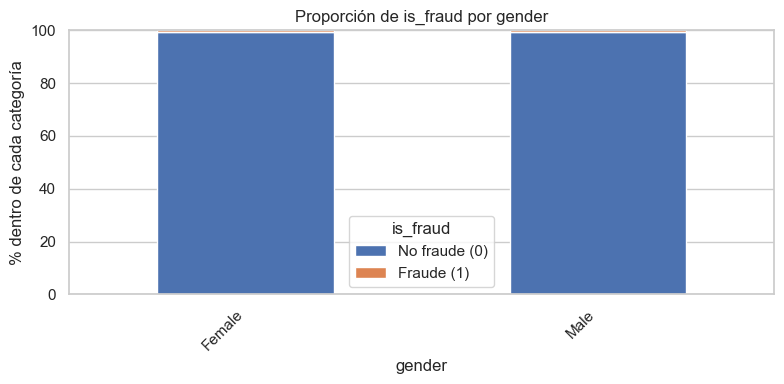

is_fraud,0,1
gender,,
Female,99.44,0.56
Male,99.39,0.61


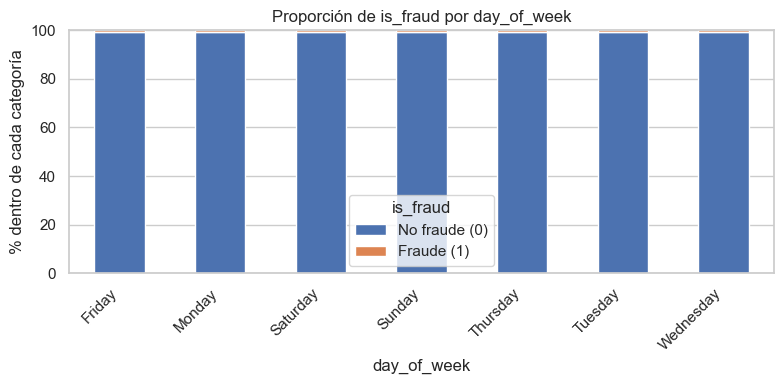

is_fraud,0,1
day_of_week,,
Friday,99.29,0.71
Monday,99.52,0.48
Saturday,99.43,0.57
Sunday,99.50,0.50
Thursday,99.33,0.67
Tuesday,99.40,0.60
Wednesday,99.30,0.70


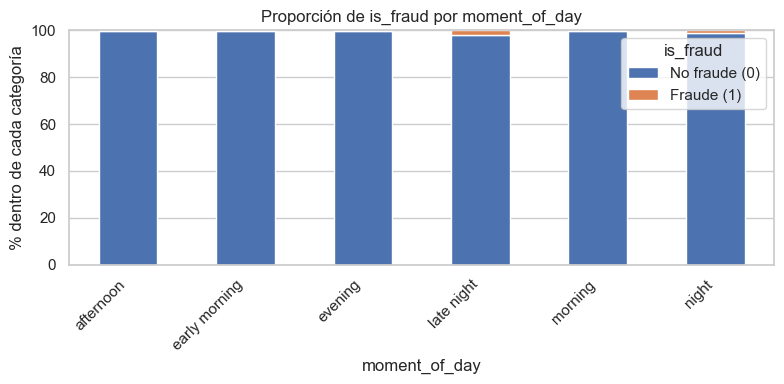

is_fraud,0,1
moment_of_day,,
afternoon,99.87,0.13
early morning,99.86,0.14
evening,99.89,0.11
late night,98.08,1.92
morning,99.90,0.10
night,98.73,1.27


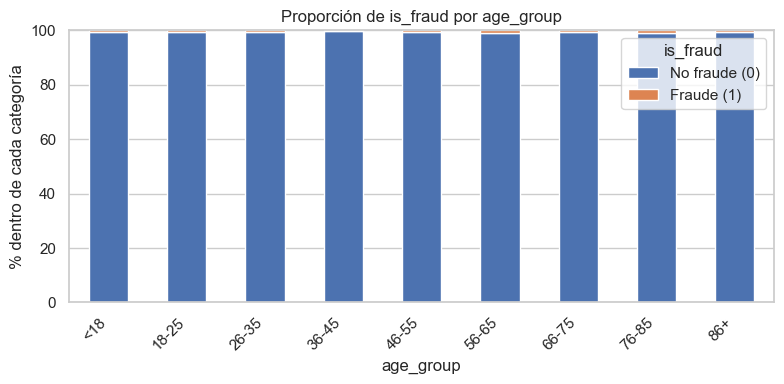

is_fraud,0,1
age_group,,
<18,99.37,0.63
18-25,99.39,0.61
26-35,99.55,0.45
36-45,99.61,0.39
46-55,99.33,0.67
56-65,99.16,0.84
66-75,99.38,0.62
76-85,99.03,0.97
86+,99.21,0.79


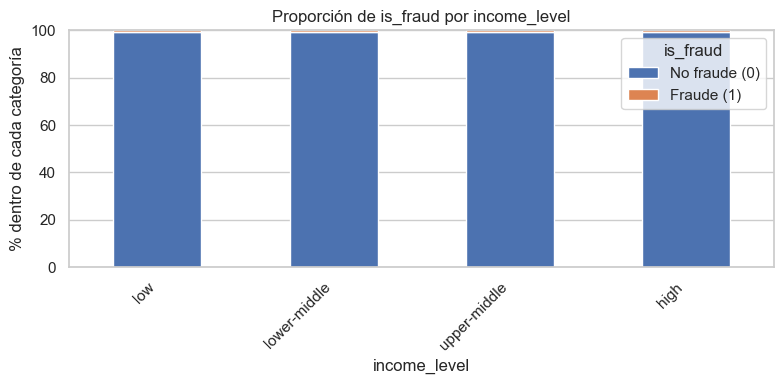

is_fraud,0,1
income_level,,
low,99.36,0.64
lower-middle,99.41,0.59
upper-middle,99.41,0.59
high,99.47,0.53


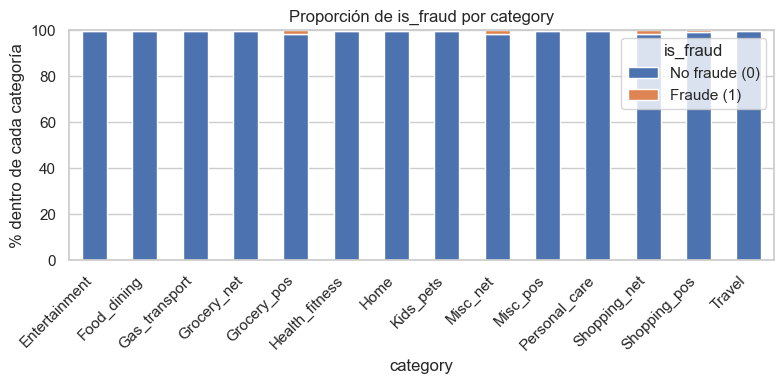

is_fraud,0,1
category,,
Entertainment,99.72,0.28
Food_dining,99.81,0.19
Gas_transport,99.57,0.43
Grocery_net,99.73,0.27
Grocery_pos,98.51,1.49
Health_fitness,99.89,0.11
Home,99.80,0.20
Kids_pets,99.78,0.22
Misc_net,98.47,1.53


In [43]:
sns.set(style="whitegrid", context="notebook")

cat_small = ["gender", "day_of_week", "moment_of_day", "age_group", "income_level", "category"]

for col in cat_small:

    tabla = pd.crosstab(df_final[col], df_final["is_fraud"], normalize="index") * 100

    ax = tabla.plot(kind="bar", stacked=True, figsize=(8, 4))

    plt.title(f"Proporción de is_fraud por {col}")

    plt.ylabel("% dentro de cada categoría")

    plt.xlabel(col)

    plt.xticks(rotation=45, ha="right")

    plt.ylim(0, 100)

    plt.legend(["No fraude (0)", "Fraude (1)"], title="is_fraud")

    plt.tight_layout()

    plt.show()

    display(tabla.round(2).head(15))

Se utilizan únicamente estas variables porque son categóricas de baja cardinalidad, es decir, tienen un número reducido de categorías. Esto permite que las barras apiladas sean legibles y que la comparación de proporciones de fraude y no fraude sea estable e interpretable. En cambio, variables que contienen cientos de categorías al representarlas con barras apiladas generaría gráficos saturados y resultados poco fiables en categorías con muy pocas observaciones.

**Observaciones:**

`gender`: Las proporciones de fraude son muy similares entre géneros, **Male** presenta una tasa ligeramente superior con 0,61% frente a **Female** con 0,56%, por lo que el género no parece un factor diferenciador fuerte por sí solo.

`day_of_week`: La tasa de fraude varía levemente según el día. Los valores más altos se observan en **Friday** con 0,71% y **Wednesday** con 0,70%, mientras que **Monday** con 0,48% es el más bajo. Aunque las diferencias son pequeñas, sugieren un patrón semanal moderado.

`moment_of_day`: Es una de las variables categóricas más informativas. La franja **late night** concentra la mayor proporción de fraude con 1,92%, seguida de **night**  con 1,27%. En contraste, **morning** con 0,10%, **evening** con 0,11% y **afternoon** con 0,13% presentan tasas muy bajas. Indica que el fraude es más frecuente en horarios nocturnos.

`age_group`: Se aprecia una tendencia a mayores tasas en edades más avanzadas. Destacan entre **76 y 85** con 0,97% y entre **56 y 65** con 0,84%, frente a grupos con menor fraude como **36 y 45** 0,39% y entre **26 y 35** con 0,45%. La relación existe, pero el efecto es moderado.

`income_level`: Las diferencias por nivel de renta son reducidas, El grupo **low** con 0,64% presenta la tasa más alta y **high** con 0,53% la más baja. Aunque hay una ligera tendencia, el impacto es pequeño.

`state`: Las tasas por estado son generalmente bajas y bastante próximas entre sí. En el fragmento mostrado, **District of Columbia** con 0,91% y **Arizona** con 0,86% destacan por encima, pero en general el patrón no muestra una separación clara, ya que casos como **Hawaii** con 100% son consecuencia de muy pocas observaciones y no deben interpretarse como concluyentes.

`category`: Se observan diferencias claras por tipo de compra, las categorías con mayor proporción de fraude son **Shopping_net** con 1,64%, **Misc_net** con 1,53% y **Grocery_pos** con 1,49%, mientras que categorías como **Health_fitness** con 0,11%, **Food_dining** con 0,19% o **Home** con 0,20% presentan tasas más bajas. Esto sugiere que el riesgo de fraude depende de la categoría de consumo.

## Correlación entre las variables numéricas

### Matriz de correlación

In [44]:
corr_matrix = df_final[cols_num_final].corr()

corr_matrix.round(2)

,amt,city_pop,is_fraud,number_of_returns,avg_agi,avg_total_income,avg_taxable_income,hour,age,taxable_share,amt_vs_avg_agi
amt,1.00,0.00,0.22,0.01,-0.00,-0.00,-0.00,-0.03,-0.01,-0.00,0.95
city_pop,0.00,1.00,0.00,0.38,0.18,0.18,0.19,0.02,-0.10,0.13,-0.00
is_fraud,0.22,0.00,1.00,-0.00,0.00,0.00,0.00,0.01,0.01,-0.00,0.21
number_of_returns,0.01,0.38,-0.00,1.00,0.16,0.16,0.16,0.04,-0.15,0.19,-0.02
avg_agi,-0.00,0.18,0.00,0.16,1.00,1.00,1.00,-0.01,0.02,0.72,-0.10
avg_total_income,-0.00,0.18,0.00,0.16,1.00,1.00,0.99,-0.01,0.02,0.72,-0.10
avg_taxable_income,-0.00,0.19,0.00,0.16,1.00,0.99,1.00,-0.01,0.03,0.72,-0.10
hour,-0.03,0.02,0.01,0.04,-0.01,-0.01,-0.01,1.00,-0.18,0.00,-0.02
age,-0.01,-0.10,0.01,-0.15,0.02,0.02,0.03,-0.18,1.00,-0.02,-0.01
taxable_share,-0.00,0.13,-0.00,0.19,0.72,0.72,0.72,0.00,-0.02,1.00,-0.12


**Observaciones:**

La matriz de correlación permite identificar de forma rápida qué variables numéricas se mueven conjuntamente y cuáles aportan información más independiente. En este caso, la mayoría de correlaciones con `is_fraud` son bajas, lo que indica que el fraude no está explicado por una única variable numérica de manera lineal, sino que probablemente depende de combinaciones de factores.

Destacan dos relaciones clave, por encima de las demás:

`amt` mantiene una correlación positiva moderada con `is_fraud` de 0,22, lo que sugiere que, en general, importes más altos tienden a asociarse con una mayor probabilidad de fraude.

`amt_vs_avg_agi` también presenta correlación con `is_fraud` de 0,21 y, además, está muy fuertemente correlacionada con `amt` de 0,95. Esto indica que esta variable derivada está capturando en gran parte el efecto del importe, por lo que ambas aportan información muy similar.

En cuanto a las variables económicas del ZIP `avg_agi`, `avg_total_income`, `avg_taxable_income` se observa una correlación prácticamente perfecta entre ellas de 0,99 y 1, lo que evidencia multicolinealidad, están midiendo prácticamente lo mismo. A su vez, `taxable_share` se asocia de forma notable con estas variables con una correlación de 0,72, lo que refuerza la idea de que comparten un mismo componente socioeconómico.

Por último, variables como `hour`, `city_pop`, `age` o `number_of_returns` muestran correlaciones muy cercanas a cero con `is_fraud`, indicando que su relación con el fraude, si existe, no es lineal o es de menor magnitud dentro de este conjunto de datos.

### Mapa de calor

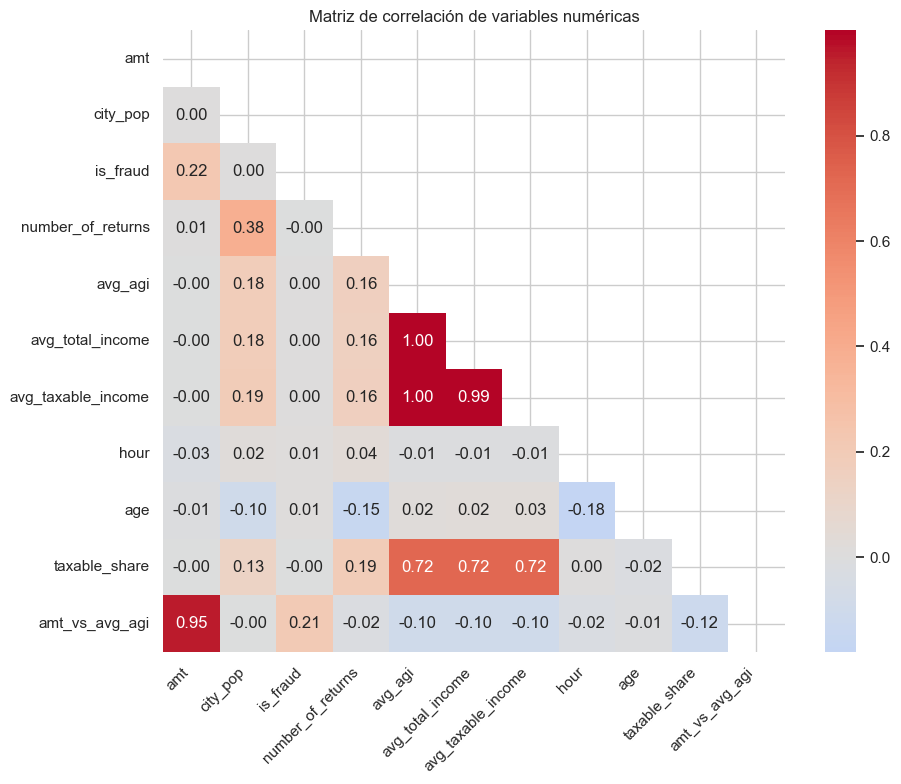

In [45]:
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap( corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)

plt.title('Matriz de correlación de variables numéricas')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

El mapa de calor permite identificar de forma visual la intensidad y el sentido de las correlaciones entre las variables numéricas. La escala de color centrada en cero facilita distinguir relaciones positivas y negativas, y el uso del triángulo inferior evita duplicidades, haciendo la lectura más clara.

En los resultados destacan varias relaciones relevantes. En primer lugar, existe una correlación muy alta entre `avg_agi`, `avg_total_income` y `avg_taxable_income`, lo que indica que estas variables están capturando prácticamente la misma información económica a nivel de ZIP lo que nos indica multicolinealidad. Además, `taxable_share` presenta una asociación positiva notable con estas variables, lo que sugiere que la proporción de ingreso imponible está vinculada al nivel de renta medio del área.

Por otro lado, `amt_vs_avg_agi` muestra una correlación muy elevada con `amt`, lo que confirma que la variable derivada está fuertemente influenciada por el importe de la transacción y puede resultar parcialmente redundante. En relación con la variable objetivo, `is_fraud` presenta correlaciones moderadas con `amt` y `amt_vs_avg_agi`, lo que apunta a que importes más altos en términos de nivel de renta tienden a asociarse con mayor presencia de fraude, aunque la relación no es lo suficientemente fuerte como para explicar el fenómeno por sí sola.

En conjunto, el mapa confirma que la mayoría de variables mantienen correlaciones bajas entre sí y con `is_fraud`, y que las dependencias más importantes se concentran en dos bloques, variables económicas altamente correlacionadas entre sí y variables relacionadas con el importe de la transacción.

## Análisis Temporal

Primero se crea la variable `month` para agrupar las transacciones por mes y poder calcular métricas mensuales. Al convertir la fecha diaria a mes, todas las transacciones del mismo mes quedan bajo la misma etiqueta, lo que simplifica el análisis temporal y evita trabajar con miles de fechas distintas.

Se usa **astype(str)** para convertir el resultado a texto y así facilitar su uso en gráficos y tablas, esto evita problemas de visualización o formatos raros al representar objetos en el eje X, además deja una columna lista para usar como etiqueta, sin necesidad de formatearla después.

In [47]:
df_final["month"] = df_final["trans_date"].dt.to_period("M").astype(str)

df_final["month"].dtype.name

'object'

### Indicadores mensuales 

In [48]:
month_of_year = (df_final.groupby("month").agg(n_trans=("is_fraud", "size"),n_fraud=("is_fraud", "sum"),fraud_rate=("is_fraud", "mean")).reset_index())

month_of_year["fraud_rate_pct"] = month_of_year["fraud_rate"] * 100

month_of_year = month_of_year.sort_values("month")

#### Número de transacciones por mes

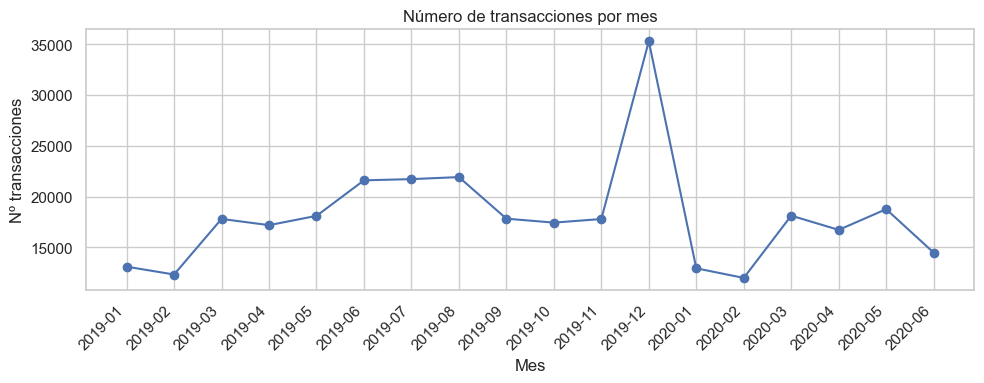

In [49]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10,4))

plt.plot(month_of_year["month"], month_of_year["n_trans"], marker="o")

plt.title("Número de transacciones por mes")

plt.xlabel("Mes")

plt.ylabel("Nº transacciones")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.show()

**Observaciones:**

El Gráfico muestra que el volumen de transacciones varía de forma clara a lo largo del tiempo y no sigue un patrón completamente estable.

Al inicio de 2019 en enero y febrero se observa un nivel más bajo, a partir de marzo el volumen aumenta y se mantiene más alto y relativamente estable hasta llegar a mayo. Entre junio y agosto se aprecia otro incremento del volumen que se mantiene, lo que es coherente con un periodo de mayor actividad como son las vacaciones de verano, a partir de septiembre de 2019 se observa una reducción moderada y una estabilización en niveles similares a los meses previos al verano, este comportamiento se mantiene hasta noviembre.

En diciembre de 2019, se observa el punto más destacado donde aparece un pico muy pronunciado, muy por encima del resto de meses. La interpretación de un aumento asociado a campañas o periodo navideño es consistente con lo que se ve en la serie, y es importante tenerlo en cuenta porque puede sesgar comparaciones basadas en recuentos, ya que por el hecho de haber muchas más transacciones, es posible que existan un mayor numero de transacciones fraudulentas.

Tras ese máximo, en enero y febrero de 2020 se produce una caída fuerte que devuelve el volumen a valores parecidos a los de comienzos de 2019, a partir de marzo de 2020 se aprecia una recuperación parcial, con niveles de nuevo en el rango habitual, aunque en el mes de junio se observa una nueva bajada, finalizando el periodo comprendido en el grafico.

En conjunto, este gráfico justifica que el análisis temporal del fraude se interprete principalmente en términos de tasa mensual, lo que se llevará a cabo más adelante y no solo con recuentos absolutos, ya que un mes con más actividad puede acumular más casos de fraude simplemente por volumen, aunque el riesgo relativo no haya aumentado.

#### Número de fraudes por mes

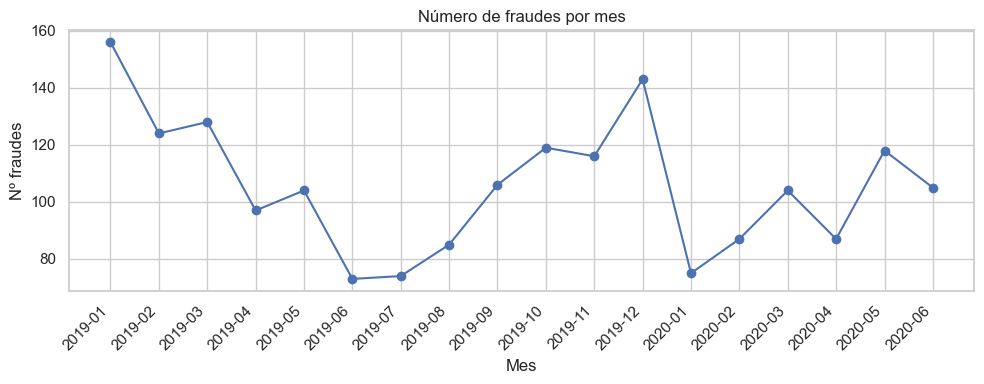

In [50]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10,4))

plt.plot(month_of_year["month"], month_of_year["n_fraud"], marker="o")

plt.title("Número de fraudes por mes")

plt.xlabel("Mes")

plt.ylabel("Nº fraudes")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.show()

**Observaciones:**

El recuento mensual de fraudes no es constante y muestra oscilaciones a lo largo del tiempo. Al inicio de 2019 se observan valores relativamente altos, siendo enero el mes con el mayor número de fraudes, desde este momento podemos ver que se produce una caída progresiva hasta alcanzar el mínimo en el mes de junio de 2019. Desde ese punto, el número de fraudes vuelve a aumentar, con una tendencia ascendente que culmina en un máximo muy marcado en el mes de diciembre de 2019.

Al comparar con el gráfico de número de transacciones, el pico de diciembre también aparece, lo que sugiere que parte del aumento en fraudes puede estar relacionado con el incremento general de actividad en ese mes. Tras el mes de diciembre, en enero de 2020 se observa una caída brusca del número de fraudes, coherente con la bajada fuerte del volumen total mostrada también en el gráfico de número de transacciones.

A partir del mes enero de 2020 se observa como aumenta el número de fraudes nuevamente, tendencia que continua hasta mayo de 2020, reduciendose el número de fraudes en el mes de junio, ultimo mes del periodo análizado. 

La interpretación de este gráfico debe hacerse junto al volumen total, ya que meses con más transacciones tienden a acumular más fraudes, aunque el porcentaje de fraude no necesariamente aumente. Por eso, este gráfico al igual que el gráfico de número de transacciones se complementa mejor con la tasa de fraude mensual para evaluar si cambia el riesgo real entre meses.

#### Tasa de fraude por mes

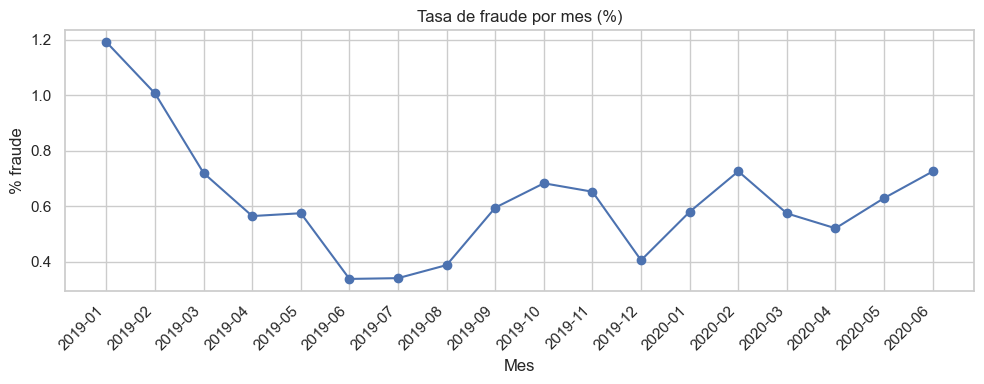

In [51]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10,4))

plt.plot(month_of_year["month"], month_of_year["fraud_rate_pct"], marker="o")

plt.title("Tasa de fraude por mes (%)")

plt.xlabel("Mes")

plt.ylabel("% fraude")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.show()

**Observaciones:**

La tasa mensual de fraudes no es constante y muestra oscilaciones a lo largo del periodo comprendido. Se observa que al inicio de 2019 se presenta la tasas más elevadas, alcanzando su máximo en el mes de enero, seguido de una bajada muy pronunciada hasta llegar al mes de junio de 2019, donde se alcanzan los valores más bajos. A partir de ese momento, la tasa vuelve a aumentar hasta el mes de octubre, después vuelve a descender hasta llegar al mes de diciembre.

En comparación con los gráficos de número de transacciones y número de fraudes, diciembre de 2019 muestra una diferencia importante, aunque hay un pico muy alto tanto en volumen de transacciones como en fraudes, ese incremento no se traduce en un aumento de la tasa de fraude. Esto sugiere que el crecimiento de fraudes en diciembre se debe principalmente al aumento excepcional de actividad, al haber muchas más transacciones, también aparecen más casos de fraude en términos absolutos, pero la proporción de transacciones fraudulentas no crece al mismo ritmo. Por eso, en el gráfico de tasa se observa una disminución, indicando que el riesgo relativo de fraude en ese mes es menor pese a que el número total de fraudes sea alto.

En enero de 2020, tras la caída de diciembre de 2019, la tasa sufre otro incremento llegando a niveles intermedios en el mes de febrero, posteriormente se produce una caída de la tasa hasta llegar al mes de abril, donde se produce un repunte que se mantiene hasta el final del periodo observado en el grafico.

En conjunto, este gráfico es el que mejor resume el riesgo mensual de fraude, ya que permite comparar meses sin que el volumen de actividad distorsione la interpretación, a diferencia de los recuentos absolutos de los gráficos de número de transacciones y número de fraudes.

#### Tabla de datos indicadores mensuales

In [52]:
monthly_table = month_of_year[["month", "n_trans", "n_fraud", "fraud_rate_pct"]]

display(monthly_table)

,month,n_trans,n_fraud,fraud_rate_pct
0,2019-01,13101,156,1.190749
1,2019-02,12326,124,1.006004
2,2019-03,17799,128,0.719142
3,2019-04,17186,97,0.564413
4,2019-05,18100,104,0.574586
5,2019-06,21598,73,0.337994
6,2019-07,21717,74,0.340747
7,2019-08,21916,85,0.387844
8,2019-09,17823,106,0.594737
9,2019-10,17436,119,0.682496


Se incluye una tabla resumen al final para mostrar de forma explícita los valores numéricos que hay detrás de los gráficos, ya que mientras que las gráficas permiten identificar patrones y tendencias de manera visual y rápida, la tabla aporta el detalle exacto necesario para respaldar las interpretaciones, facilitando la comparación entre periodos y mejorando la trazabilidad del análisis. De este modo, el lector puede confirmar los resultados del gráfico con datos concretos sin saturar la parte visual del EDA.

### Patrón horario

In [53]:
by_hour = (df_final.groupby("hour").agg(n_trans=("is_fraud", "size"),n_fraud=("is_fraud", "sum"),fraud_rate=("is_fraud", "mean")).reset_index())

by_hour["fraud_rate_pct"] = (by_hour["fraud_rate"] * 100).round(2)

#### Tasa de fraude por hora

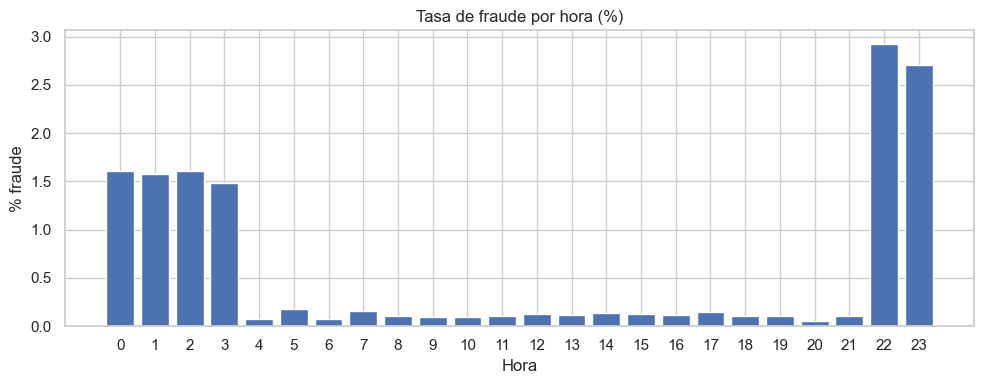

In [54]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10,4))

plt.bar(by_hour["hour"], by_hour["fraud_rate_pct"])

plt.title("Tasa de fraude por hora (%)")

plt.xlabel("Hora")

plt.ylabel("% fraude")

plt.xticks(range(0,24))

plt.tight_layout()

plt.show()

**Observaciones:**

El gráfico evidencia un patrón intradía muy marcado, la tasa de fraude es claramente más alta durante la noche. Destacan especialmente las horas 22:00 y 23:00, donde el porcentaje de fraude alcanza los valores máximos del día ,muy por encima del resto. También se observan niveles relativamente elevados en la franja de 00:00 a 03:00.

En cambio, durante el horario de 04:00 a 21:00 la tasa de fraude se mantiene muy baja y bastante estable, sin picos relevantes.

En conjunto, esto sugiere que el riesgo de fraude no es uniforme a lo largo del día y que las horas nocturnas concentran una mayor proporción de transacciones fraudulentas, por lo que la variable `hour` o `moment_of_day` aporta información útil para caracterizar el fraude.

#### Tabla de datos tasa de fraude por hora

In [55]:
hour_table = by_hour[["hour", "n_trans", "n_fraud", "fraud_rate_pct"]]

display(hour_table)

,hour,n_trans,n_fraud,fraud_rate_pct
0,0,10540,170,1.61
1,1,10597,167,1.58
2,2,10572,170,1.61
3,3,10541,156,1.48
4,4,10540,8,0.08
5,5,10459,19,0.18
6,6,10604,8,0.08
7,7,10541,17,0.16
8,8,10590,12,0.11
9,9,10488,10,0.10


Se añade una tabla por hora para complementar el gráfico y permitir identificar con precisión qué franjas concentran mayor tasa de fraude, junto con el volumen de transacciones y el número de fraudes. Esto facilita comparar horas entre sí sin depender únicamente de la lectura visual de la curva.

#### Fraude por momento del día

In [57]:
order_moment = ["early morning", "morning", "afternoon", "evening", "night", "late night"]

by_moment = (df_final.groupby("moment_of_day").agg(n_trans=("is_fraud", "size"),n_fraud=("is_fraud", "sum"),fraud_rate=("is_fraud", "mean")).reindex(order_moment).reset_index())

by_moment["fraud_rate_pct"] = (by_moment["fraud_rate"] * 100).round(2)

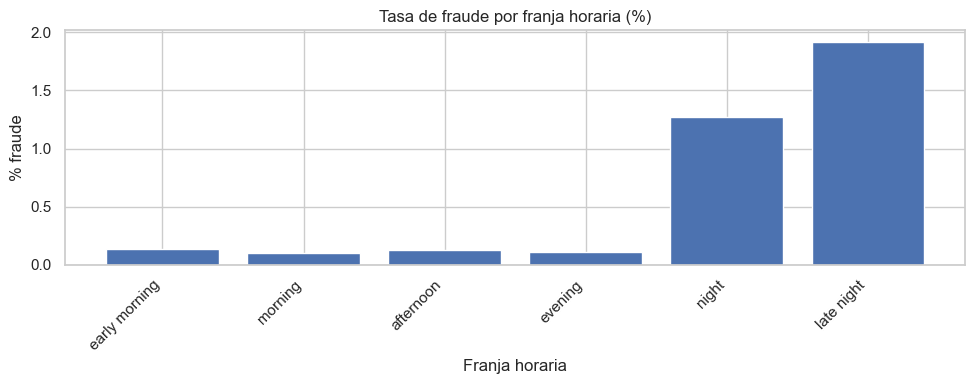

In [58]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10,4))

plt.bar(by_moment["moment_of_day"], by_moment["fraud_rate_pct"])

plt.title("Tasa de fraude por franja horaria (%)")

plt.xlabel("Franja horaria")

plt.ylabel("% fraude")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.show()

**Observaciones:**

La tasa de fraude por franja horaria muestra un patrón muy claro, la proporción de fraude es muy baja y bastante estable en las franjas diurnas **early morning**, **morning**, **afternoon** y **evening**, todas alrededor del 0.1%, mientras que aumenta de forma notable durante la noche. En concreto, **night** sube claramente hasta casi el 1.3% y el máximo se concentra en **late night** con un 1.9%, indicando que el fraude se produce de forma desproporcionada en horarios nocturnos.

Al compararlo con el gráfico de tasa de fraude por hora, esta conclusión se refuerza, los picos más altos de la tasa horaria se concentran al final del día de 22:00 a 23:00 y también aparecen valores elevados en la madrugada de 0:00 a 3:00. Es decir, el gráfico por hora muestra dónde están los máximos concretos de forma mas exacta, y el gráfico de franjas horarias los resume mostrando que, en conjunto, la noche y especialmente la franja **late night** concentran el mayor riesgo relativo de fraude.


#### Tabla de datos fraude por franja horaria

In [59]:
moment_table = by_moment[["moment_of_day", "n_trans", "n_fraud", "fraud_rate_pct"]]

display(moment_table)

,moment_of_day,n_trans,n_fraud,fraud_rate_pct
0,early morning,31604,44,0.14
1,morning,42101,44,0.10
2,afternoon,82318,105,0.13
3,evening,65886,70,0.11
4,night,52790,671,1.27
5,late night,50391,967,1.92


Se incluye una tabla resumen para cuantificar con precisión la tasa de fraude en cada franja horaria y evitar que el gráfico, al agrupar categorías, oculte pequeñas diferencias pero relevantes. La tabla permite comparar rápidamente franjas entre sí y validar el patrón observado en night y late night con valores exactos.

### Variación semanal 

#### Tasa de fraude por día de la semana

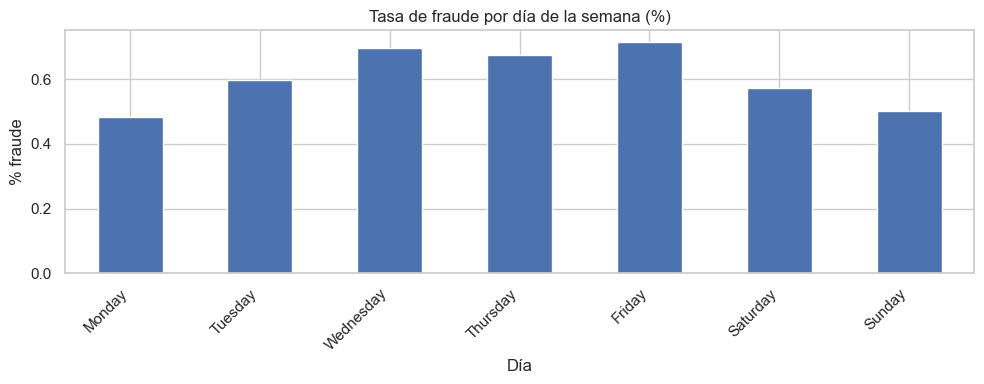

In [60]:
sns.set(style="whitegrid", context="notebook")

order_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

tasa = pd.crosstab(df_final["day_of_week"], df_final["is_fraud"], normalize="index") * 100

tasa = tasa.reindex(order_day)

ax = tasa[1].plot(kind="bar", figsize=(10,4))

plt.title("Tasa de fraude por día de la semana (%)")

plt.xlabel("Día")

plt.ylabel("% fraude")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.show()

**Observaciones:**

El gráfico muestra que la tasa de fraude varía de forma moderada según el día, aunque sin cambios extremos. Los valores más altos se observan en viernes donde alcanza su máximo, seguido del miércoles y jueves, donde el porcentaje de fraude es ligeramente superior al resto.

En cambio, lunes presenta la tasa más baja y domingo también se sitúa en la parte inferior. En conjunto, el patrón sugiere que existe un ligero aumento del riesgo hacia la segunda mitad de la semana, pero las diferencias entre días son relativamente pequeñas, por lo que la variación respescto de la variable `day_of_week` parece menos marcada que la se observa por la variable `hour` o `moment_of_day`.

#### Tabla de datos fraude por día de la semana

In [61]:
by_day = (df_final.groupby("day_of_week").agg(n_trans=("is_fraud", "size"),n_fraud=("is_fraud", "sum"),fraud_rate=("is_fraud", "mean")).reindex(order_day).reset_index())

by_day["fraud_rate_pct"] = (by_day["fraud_rate"] * 100).round(2)

day_table = by_day[["day_of_week", "n_trans", "n_fraud", "fraud_rate_pct"]]

display(day_table)

,day_of_week,n_trans,n_fraud,fraud_rate_pct
0,Monday,63890,308,0.48
1,Tuesday,39851,238,0.60
2,Wednesday,32636,227,0.70
3,Thursday,36923,249,0.67
4,Friday,38200,273,0.71
5,Saturday,50756,290,0.57
6,Sunday,62834,316,0.50


Se incluye una tabla semanal para resumir de forma ordenada las diferencias entre días, mostrando recuentos y porcentajes en un único lugar. De esta forma se puede verificar rápidamente qué días presentan mayor proporción de fraude y si las variaciones observadas son relevantes o marginales.

#### Tasa de fraude fin de semana vs laborable

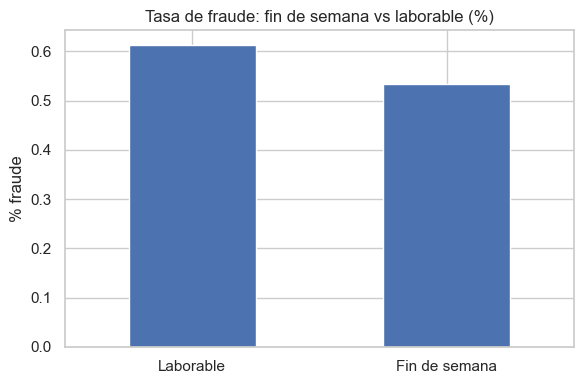

In [62]:
sns.set(style="whitegrid", context="notebook")

df_final["is_weekend"] = df_final["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)

tasa_weekend = pd.crosstab(df_final["is_weekend"], df_final["is_fraud"], normalize="index") * 100

ax = tasa_weekend[1].plot(kind="bar", figsize=(6,4))

plt.title("Tasa de fraude: fin de semana vs laborable (%)")

plt.xlabel("")

plt.ylabel("% fraude")

ax.set_xticklabels(["Laborable", "Fin de semana"], rotation=0)

plt.tight_layout()

plt.show()

**Obsevaciones:**

La tasa de fraude es ligeramente mayor en días laborables que en fin de semana. Aunque la diferencia no es grande, sugiere que el riesgo relativo de fraude se concentra algo más durante la actividad habitual de la semana.

Al compararlo con el gráfico de tasa de fraude por día de la semana, esta conclusión encaja con lo observado, ya que los valores más altos aparecen en días entre semana, mientras que sábado y domingo muestran tasas algo más bajas. Al agrupar todo en fin de semana vs laborable, se pierde el detalle diario, pero se confirma el patrón general.

#### Tabla datos fraude fin de semana vs laborable

In [63]:
by_weekend = (df_final.groupby("is_weekend").agg(n_trans=("is_fraud", "size"),n_fraud=("is_fraud", "sum"),fraud_rate=("is_fraud", "mean")).reset_index())

by_weekend["fraud_rate_pct"] = (by_weekend["fraud_rate"] * 100).round(2)

weekend_table = by_weekend[["is_weekend", "n_trans", "n_fraud", "fraud_rate_pct"]]

display(weekend_table)

,is_weekend,n_trans,n_fraud,fraud_rate_pct
0,0,211500,1295,0.61
1,1,113590,606,0.53


Se incluye una tabla resumen para mostrar los valores exactos de transacciones, fraudes y porcentaje en laborable vs fin de semana, ya que el gráfico solo refleja la diferencia visual entre ambos grupos. La tabla permite cuantificar la magnitud real de esa diferencia de forma clara y verificable.
La tabla permite medir con precisión esa diferencia, facilitando su comprobación con valores exactos.

## Conclusiones generales

                    FIN

..........................................................................................................